# Collection of the library for the code 

In [12]:
library(readxl)
library(RColorBrewer)
library(corrplot)
#install.packages("psych")
#install.packages("PerformanceAnalytics")
library(PerformanceAnalytics)
library(psych)
library(mvtnorm) # col.norm
library(tilting) # col.norm
library(ggplot2)
library("np") #npreg: you may need to install it
#install.packages(c("FactoMineR", "factoextra"))
library("FactoMineR")
library(tidyverse) #data Manipulation
library(cluster) #Clustering algorithms
library(factoextra)#Clustering Algorithms & Visualization
library(gridExtra)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(ggplot2) # ggplot
library(rlang) # clustering cutting
#install.packages('NbClust')
library(NbClust)
#install.packages('fmsb')
library(fmsb) #For Spider Plots
#install.packages('countrycode')
library(countrycode)

PRE-PROCESSING 


In [15]:
df <- read_excel("...data/tidy/Cumulative_Data.xlsx",sheet=1)
head(df)

ERROR: Error: `path` does not exist: '...data/tidy/Cumulative_Data.xlsx'


Cleaning Column Years

In [ ]:
for (i in seq(1, nrow(df))) {
    if (grepl("-", df[i,'Year'])) {
        yy1 = substr(df[i,"Year"], start=1,stop=2)
        yy2 = substr(df[i,"Year"], start=6,stop=7)
        yy3 = paste(yy1,yy2,sep = "")
        #yy3 = as.integer(yy3)
        df[i,"Year"] = yy3
    }
    }

Finding the Max Years

In [ ]:
df$Year = as.numeric(df$Year)
df1 <- matrix(NA, nrow = 0, ncol = length(colnames(df))) #create new empty DF
colnames(df1) = colnames(df) # assign column names to empty data frame
for (country in unique(df$Country)) {
    maxyear = max(df[df$Country==country,'Year'])
    df1 = rbind( df1, df[(df$Country==country) & (df$Year==maxyear),])
} 

Removing Population Variables (Removal of duplication)

In [ ]:
dfh = df1[,!grepl("^P_",names(df1))]

NA and zeros Analysis

In [ ]:
na_count = colSums(is.na(dfh)) #Counting all your NA in each data frames
na_count

Removing column for household data frame if NA is greater than 50%`

In [ ]:
dfsimple = dfh[, which(colMeans(!is.na(dfh)) > 0.5)]
head(dfsimple)
na_count_cleaned = colSums(is.na(dfsimple)) #Counting all your NA in each data frames
na_count_cleaned
hist(na_count_cleaned)
zeros = colSums(dfsimple != 0) # Counting all your zeros in each data frame

Determination of continents for each country

In [ ]:
dfsimple

Preliminary Data Visualization

In [ ]:
hist(dfsimple$ 'Year', main="Year of surveys",
     xlab="Years",
     ylab="Frequency",
     col.main="red", col.lab="blue")
summary(dfsimple$uiws ) # House hold with unimproved water source
hist(dfsimple$uiws, main="Households using an unimproved water source",
     xlab="Total Percentage",
     ylab="Frequency",
     col.main="red", col.lab="blue")
plot(dfsimple$uiws , main="Households using an unimproved water source",
     xlab="Index",
     ylab="Total Percentage",
     col.main="red", col.lab="blue")
summary(dfsimple$bicy) # house hold with possession of bicycle. 
hist(dfsimple$bicy, main="Households possessing a bicycle",
     xlab="Total Percentage",
     ylab="Frequency",
     col.main="red", col.lab="blue")
plot(dfsimple$bicy, main="Households possessing a bicycle",
     xlab="Index",
     ylab="Total Percentage",
     col.main="red", col.lab="blue")
summary(df$Year)
summary(dfsimple$Country)

# Correlation Plots 

Data Frame 1

Created all the NA to zeros to have a numerical study of the data

In [5]:
dfsimple[is.na(dfsimple)] <- 0 # Convert all your NA to 0 to keep numeric values
my_data <- dfsimple[, c(4:31)]
head(my_data, 31)
res <- cor(my_data)
round(res, 2)
M<-cor(my_data)
head(round(M,2))
corrplot(M, type="upper", tl.cex = 1)

as.data.frame(dfsimple)

ERROR: Error in dfsimple[is.na(dfsimple)] <- 0: object 'dfsimple' not found


# Advanced Correlation Graphs

In [6]:
#sample for water sources
my_data_acc <- dfsimple[, c(4:22)]
chart.Correlation(my_data_acc, histogram=TRUE, pch=19 , tl.cex = .7 )
#sample for location/premise
my_data_loc <- dfsimple[, c(21:25)]
chart.Correlation(my_data_loc, histogram=TRUE, pch=19 , tl.cex = .5 )
#sample for transportation
my_data_move <- dfsimple[, c(26:30)]
chart.Correlation(my_data_move, histogram=TRUE, pch=19 , tl.cex = .5 )
#Comparison with Transportation and Time it gets to the source of water
my_data_time <- dfsimple[, c(26:30,23:25)]
chart.Correlation(my_data_time, histogram=TRUE, pch=19 , tl.cex = .5 )
#sample for transportation compared with wealth
my_data_money <- dfsimple[, c(26:31)]
chart.Correlation(my_data_money, histogram=TRUE, pch=19 , tl.cex = .5 )
#sample for transportation, water retrieving part 1 comparison
my_data_water1 <- dfsimple[, c(26:30, 4:13)]
chart.Correlation(my_data_water1, histogram=TRUE, pch=19 , tl.cex = .5 )
#sample for transportation, water retrieving part 2 comparison
my_data_water2 <- dfsimple[, c(26:30, 14:22)]
chart.Correlation(my_data_water2, histogram=TRUE, pch=19 , tl.cex = .5 )

ERROR: Error in eval(expr, envir, enclos): object 'dfsimple' not found


# Principal Component Analysis

In [7]:
# PCA Scree plot without standardizing data
hpca_dfsimple <- prcomp(my_data, scale=FALSE) # Scale to 0 to 1 # We can extract the information summarized above (and much more) # from the attributes of the object hpca_dfsimple

standard_deviation_of_each_component <- hpca_dfsimple$sdev
var_per_dim <- standard_deviation_of_each_component^2
var_tot <- sum(var_per_dim)
var_tot
var_per_dim/var_tot

var_prop <- var_per_dim / sum(var_per_dim)
var_prop

cum_var <- cumsum(var_prop)
cum_var
plot(cum_var,xlab="Principal component", 
     ylab="Proportion of variance explained", ylim=c(0,1), type='b')
apply(my_data, 2, mean)
apply(my_data, 2, var)
hpca_cor <- prcomp(my_data, scale=TRUE) #Using the correlation matrix to obtain the eigenvalue #Single decomposition of the variance matrix.
standard_deviation_of_each_component <- hpca_cor$sdev
var_per_dim <- standard_deviation_of_each_component^2
var_tot <- sum(var_per_dim)
var_prop <- var_per_dim / sum(var_per_dim)
cum_var <- cumsum(var_prop)
plot(cum_var,xlab="Principal component", 
     ylab="Proportion of variance explained", ylim=c(0,1), type='b')
eigenvectors <- hpca_cor$rotation
col.norm(eigenvectors)
eigenvectors

PC_contr <- eigenvectors[,c("PC1")] # Let us plot the contribution of the original dimension to the 1st PCA # PC_contr
ord <- order( -abs(PC_contr) )# We order by the magnitude of the contribution # We use the - sign because we want a descending order
PC_contr <- PC_contr[ord] #PC_contr

ERROR: Error in prcomp(my_data, scale = FALSE): object 'my_data' not found


# Loading Bars for 12 Dimensions

In [8]:
PC_contr1 <- PC_contr[1:7] # We just select the 7 highest contributing dimensions (highest loading)
PC_contr1
barplot(PC_contr1, main="Contribution to the 1st component", xlab="Original Dimensions") 

# Second principal component vector
PC_contr <- eigenvectors[,c("PC2")] # We order by the magnitude of the contribution
ord <- order( -abs(PC_contr) ) # We use the - sign because we want a descending order
PC_contr <- PC_contr[ord]
PC_contr2 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr2, main="Contribution to the 2nd component",xlab="Original Dimensions") 
# Third principal component vector
PC_contr <- eigenvectors[,c("PC3")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr3 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr3, main="Contribution to the 3rd component",xlab="Original Dimensions") 
# 4 principal component vector
PC_contr <- eigenvectors[,c("PC4")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr4 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr4, main="Contribution to the 4th component",xlab="Original Dimensions") 
# 5 principal component vector
PC_contr <- eigenvectors[,c("PC5")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr5 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr5, main="Contribution to the 5th component",xlab="Original Dimensions") 
# 6 principal component vector
PC_contr <- eigenvectors[,c("PC6")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr6 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr6, main="Contribution to the 6th component",xlab="Original Dimensions") 
# 7 principal component vector
PC_contr <- eigenvectors[,c("PC7")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr7 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr7, main="Contribution to the 7th component",xlab="Original Dimensions") 
# 8 principal component vector
PC_contr <- eigenvectors[,c("PC8")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr8 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr8, main="Contribution to the 8th component",xlab="Original Dimensions") 
# 9 principal component vector
PC_contr <- eigenvectors[,c("PC9")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr9 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr9, main="Contribution to the 9th component",xlab="Original Dimensions") 
# 10 principal component vector
PC_contr <- eigenvectors[,c("PC10")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr10 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr10, main="Contribution to the 10th component",xlab="Original Dimensions") 
# 11 principal component vector
PC_contr <- eigenvectors[,c("PC11")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr11 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr11, main="Contribution to the 11th component",xlab="Original Dimensions") 
# 12 principal component vector
PC_contr <- eigenvectors[,c("PC12")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr12 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr12, main="Contribution to the 12th component",xlab="Original Dimensions")
scatter.smooth(PC_contr1,PC_contr2)

ERROR: Error in eval(expr, envir, enclos): object 'PC_contr' not found


# Basics PCA with Color Visualization

In [9]:
res.pca <- PCA(my_data, graph = FALSE)
print(res.pca)
eig.val <- get_eigenvalue(res.pca) #The object that is created using the function PCA() contains many information found in many different lists and matrices. These values are described in the next section.
eig.val
#An eigenvalue > 1 indicates that PCs account for more variance than accounted by one of the original variables in
#standardized data. This is commonly used as a cutoff point for which PCs are retained. This holds true only when
#the data are standardized.
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 76))
var <- get_pca_var(res.pca)
var
# Coordinates
head(var$coord, 36)
# Cos2: quality on the factor map
head(var$cos2,36)
# Contributions to the principal components
head(var$contrib, 36)
#For all the 36 variables.
fviz_pca_var(res.pca, col.var = "black")
#The plot above is also known as variable correlation plots. It shows the relationships between all variables. It can be interpreted as follow:
#Positively correlated variables are grouped together.
#Negatively correlated variables are positioned on opposite sides of the plot origin (opposed quadrants).
#The distance between variables and the origin measures the quality of the variables on the factor map. Variables that
#are away from the origin are well represented on the factor map.
corrplot(var$cos2, is.corr=FALSE, tl.cex = 1 )
# Total cos2 of variables on Dim.1 and Dim.2
fviz_cos2(res.pca, choice = "var", axes = 1:2, tl.cex = 1)
#A high cos2 indicates a good representation of the variable on the principal component. In this case the variable is
#positioned close to the circumference of the correlation circle.
#A low cos2 indicates that the variable is not perfectly represented by the PCs.
#In this case the variable is close to the center of the circle.
#The cos2 values are used to estimate the quality of the representation
#The closer a variable is to the circle of correlations,
#the better its representation on the factor map (and the more important it is to interpret these components)
#Variables that are closed to the center of the plot are less important for the first components.
# Color by cos2 values: quality on the factor map
fviz_pca_var(res.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping, 
    )
#variables with low cos2 values will be colored in "white"
#variables with mid cos2 values will be colored in "blue"
#variables with high cos2 values will be colored in red
corrplot(var$contrib, is.corr=FALSE,tl.cex = 1) 
#The larger the value of the contribution, the more the variable contributes to the component.
# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)
# Contributions of variables to PC3
fviz_contrib(res.pca, choice = "var", axes = 3, top = 10)
# Contributions of variables to PC4
fviz_contrib(res.pca, choice = "var", axes = 4, top = 10)
# Contributions of variables to PC5
fviz_contrib(res.pca, choice = "var", axes = 5, top = 10)
fviz_contrib(res.pca, choice = "var", axes = 1:2, top = 10)
#It can be seen that the variables H IWS P and H W - contribute the most to the dimensions 1 and 2.
fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
)
res.desc <- dimdesc(res.pca, axes = c(1,2), proba = 0.05)
# Description of dimension 1
res.desc$Dim.1
res.desc$Dim.2
ind <- get_pca_ind(res.pca)
# Coordinates of individuals
head(ind$coord)
# Quality of individuals
head(ind$cos2)
# Contributions of individuals
fviz_pca_ind(res.pca, col.ind = "cos2", pointsize = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
)
# Total contribution on PC1 and PC2
fviz_contrib(res.pca, choice = "ind", axes = 1:2, tl.cex = .5)

ERROR: Error in as.data.frame(X): object 'my_data' not found


# Clustering 

In [10]:
# To apply clustering, we want to only use water accessibility variables
df.wa <- dfsimple[,c('ptap','bore','pspr', 'uspr', 'pwel', 'uwel','surw','tles','tmor','rain','phom' )]
head(df.wa)
sapply(df.wa, class)

ERROR: Error in eval(expr, envir, enclos): object 'dfsimple' not found


linkage: single or average or complete and Different Methods

In [11]:
hc=hclust(dist(df.wa), method ="single")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df1$Country)

hc=hclust(dist(df.wa), method ="average")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df1$Country)

hc.complete =hclust(dist(df.wa), method ="complete")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc.complete, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df1$Country)

hc.ward=hclust(dist(df.wa), method ="ward.D")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc.ward, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df1$Country)

hc.ward2=hclust(dist(df.wa), method ="ward.D2")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc.ward2, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df1$Country)

ERROR: Error in as.matrix(x): object 'df.wa' not found


# Determining the Best Cut for different methods

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


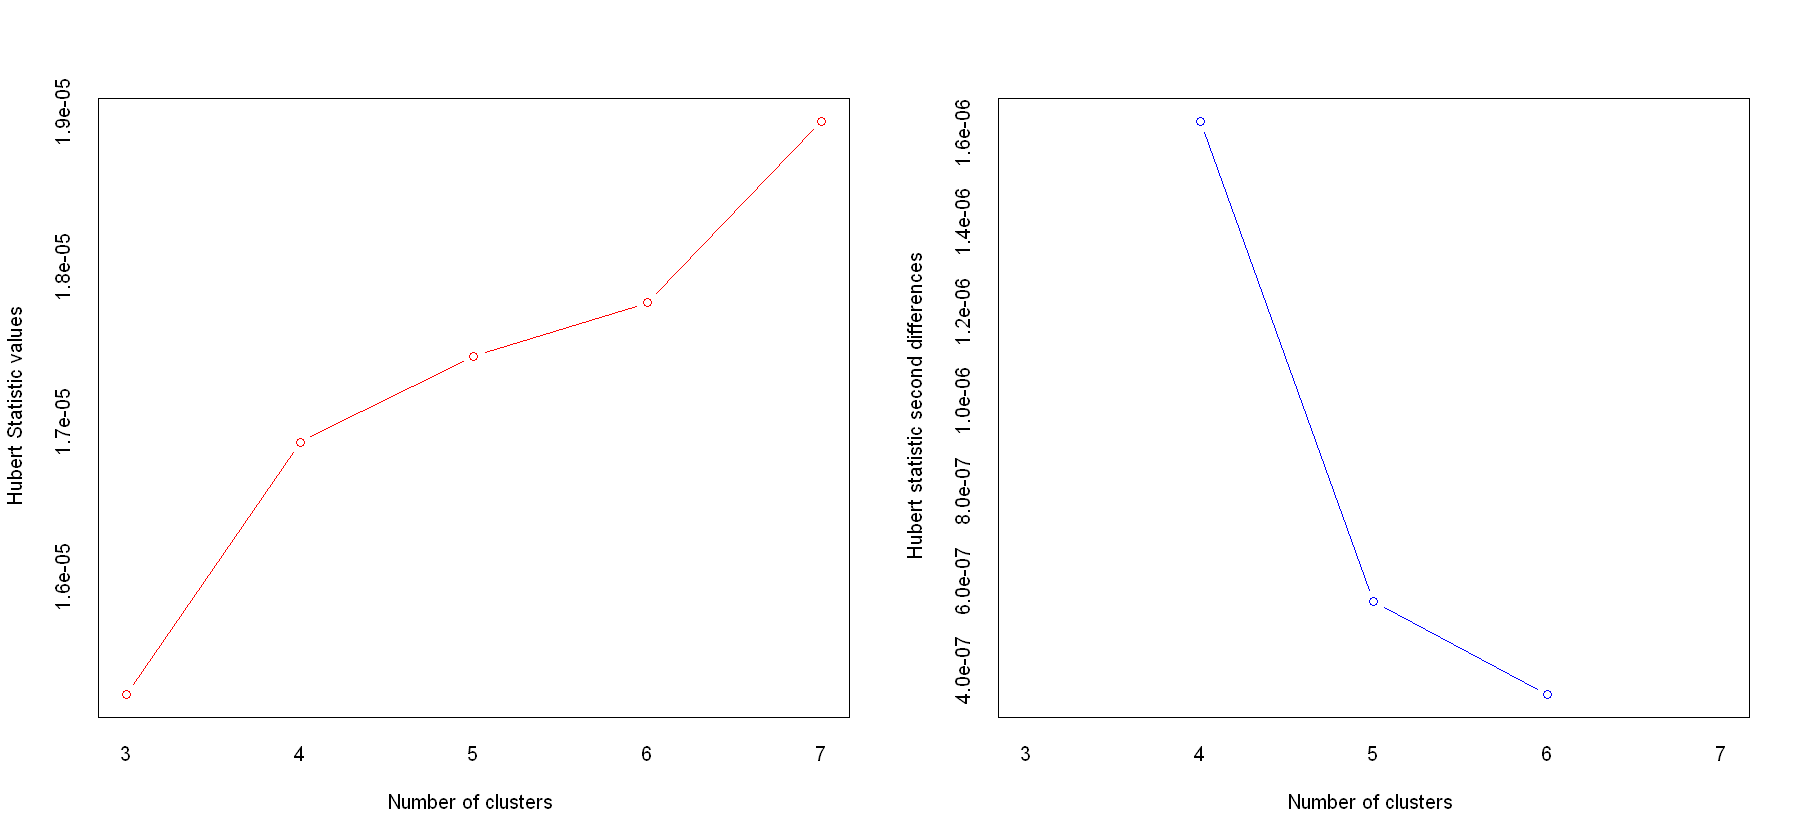

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 7 proposed 3 as the best number of clusters 
* 10 proposed 4 as the best number of clusters 
* 2 proposed 6 as the best number of clusters 
* 3 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
******************************************************************* 


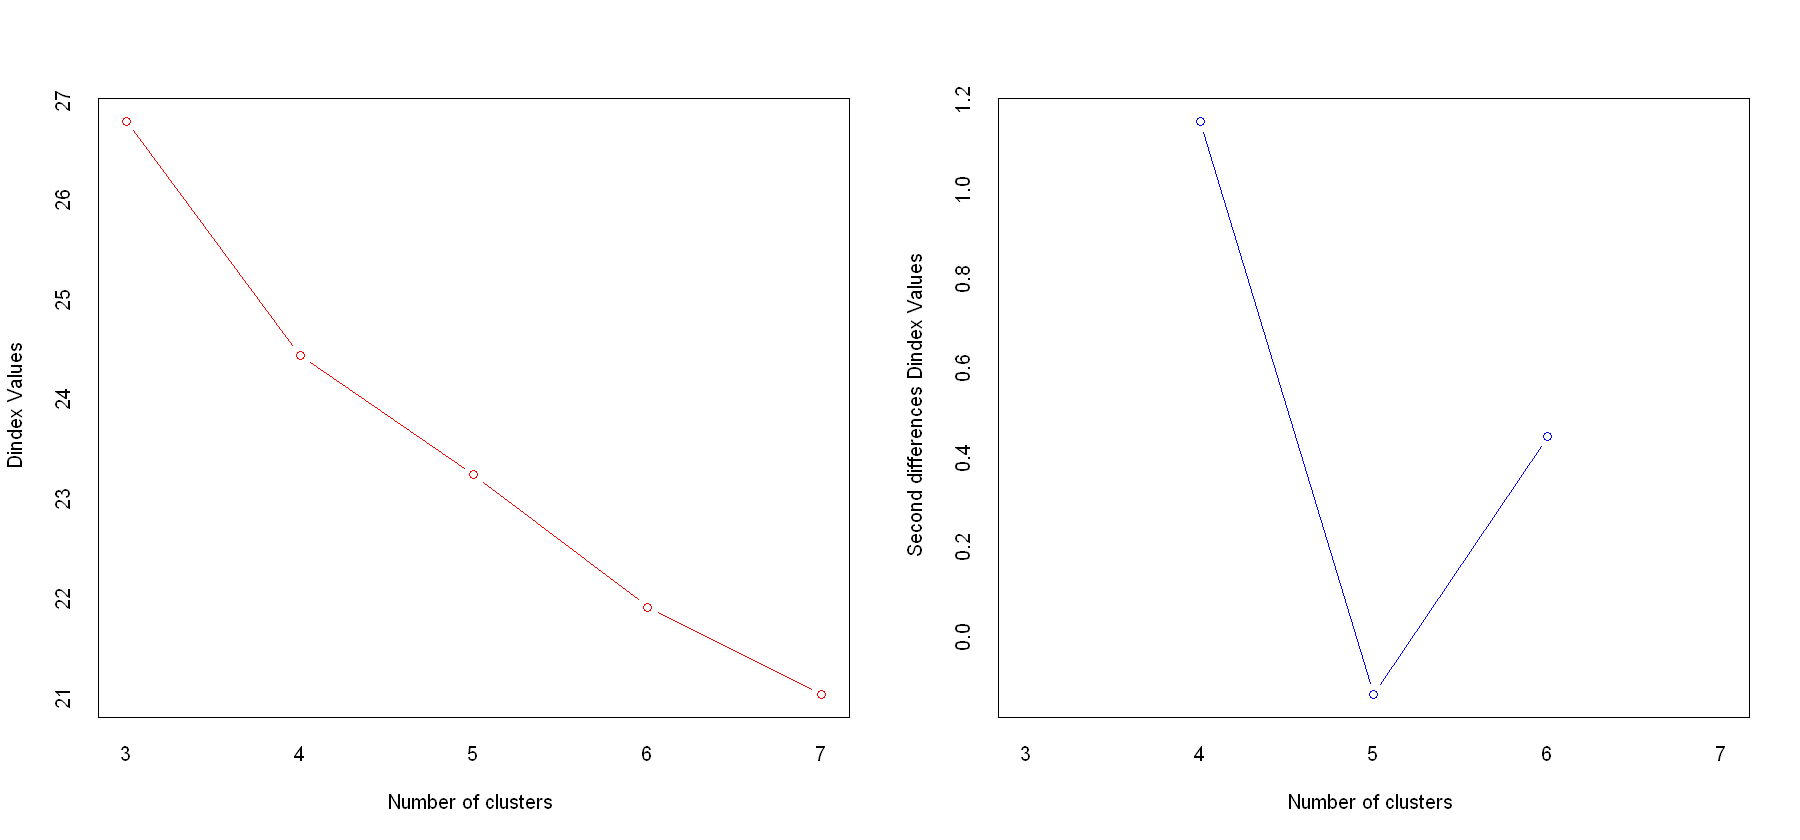

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


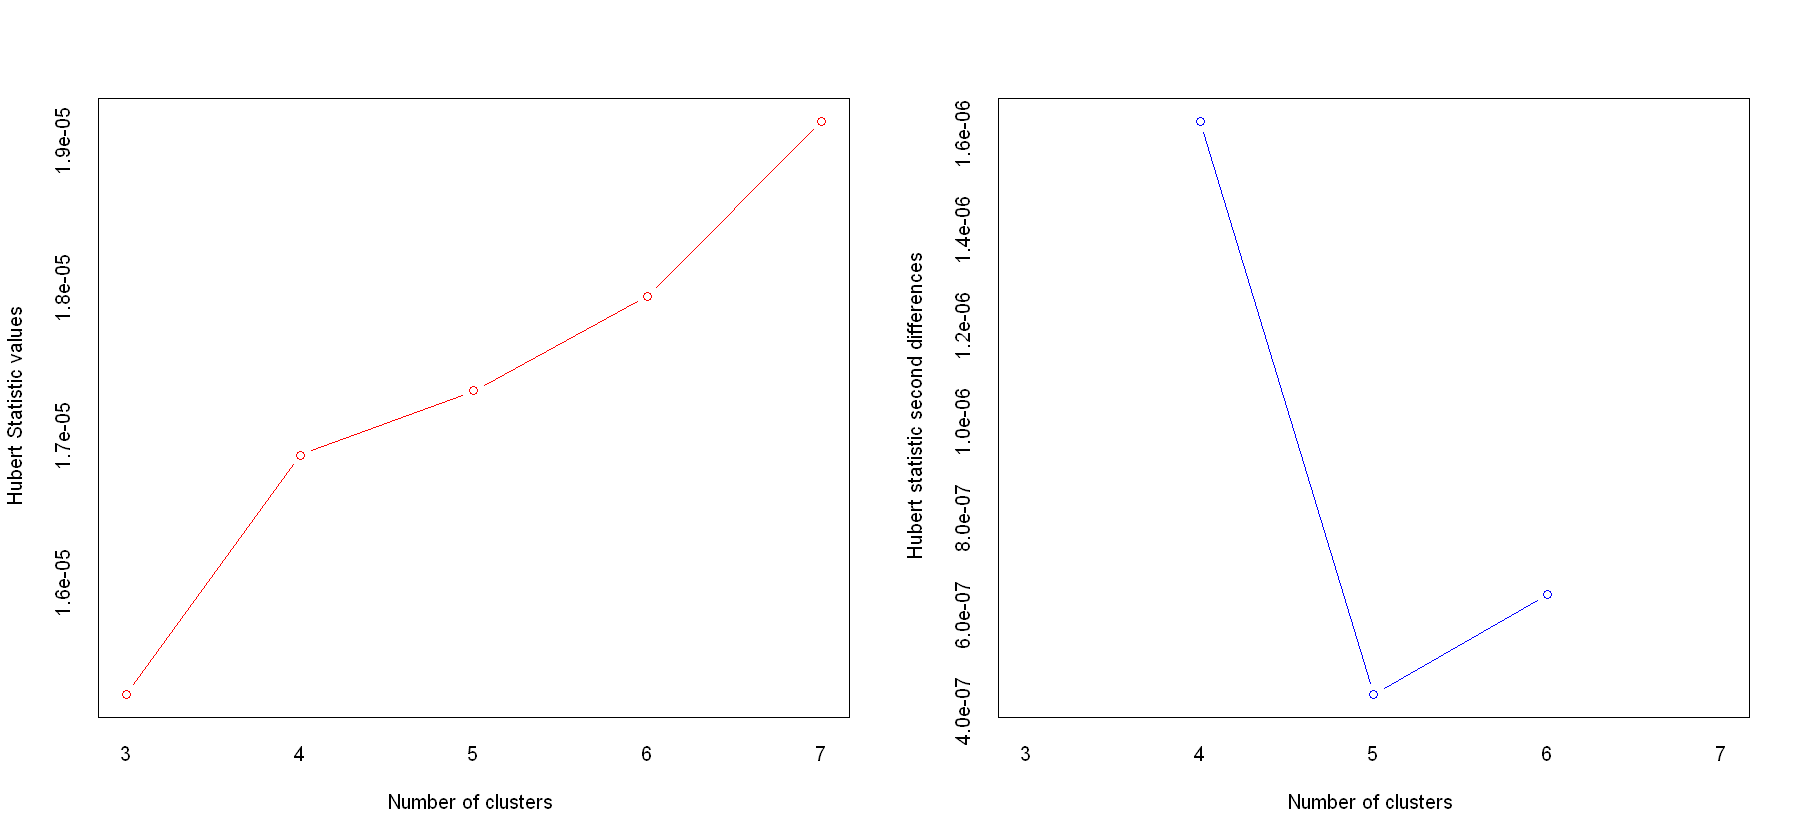

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 6 proposed 3 as the best number of clusters 
* 12 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 3 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
******************************************************************* 


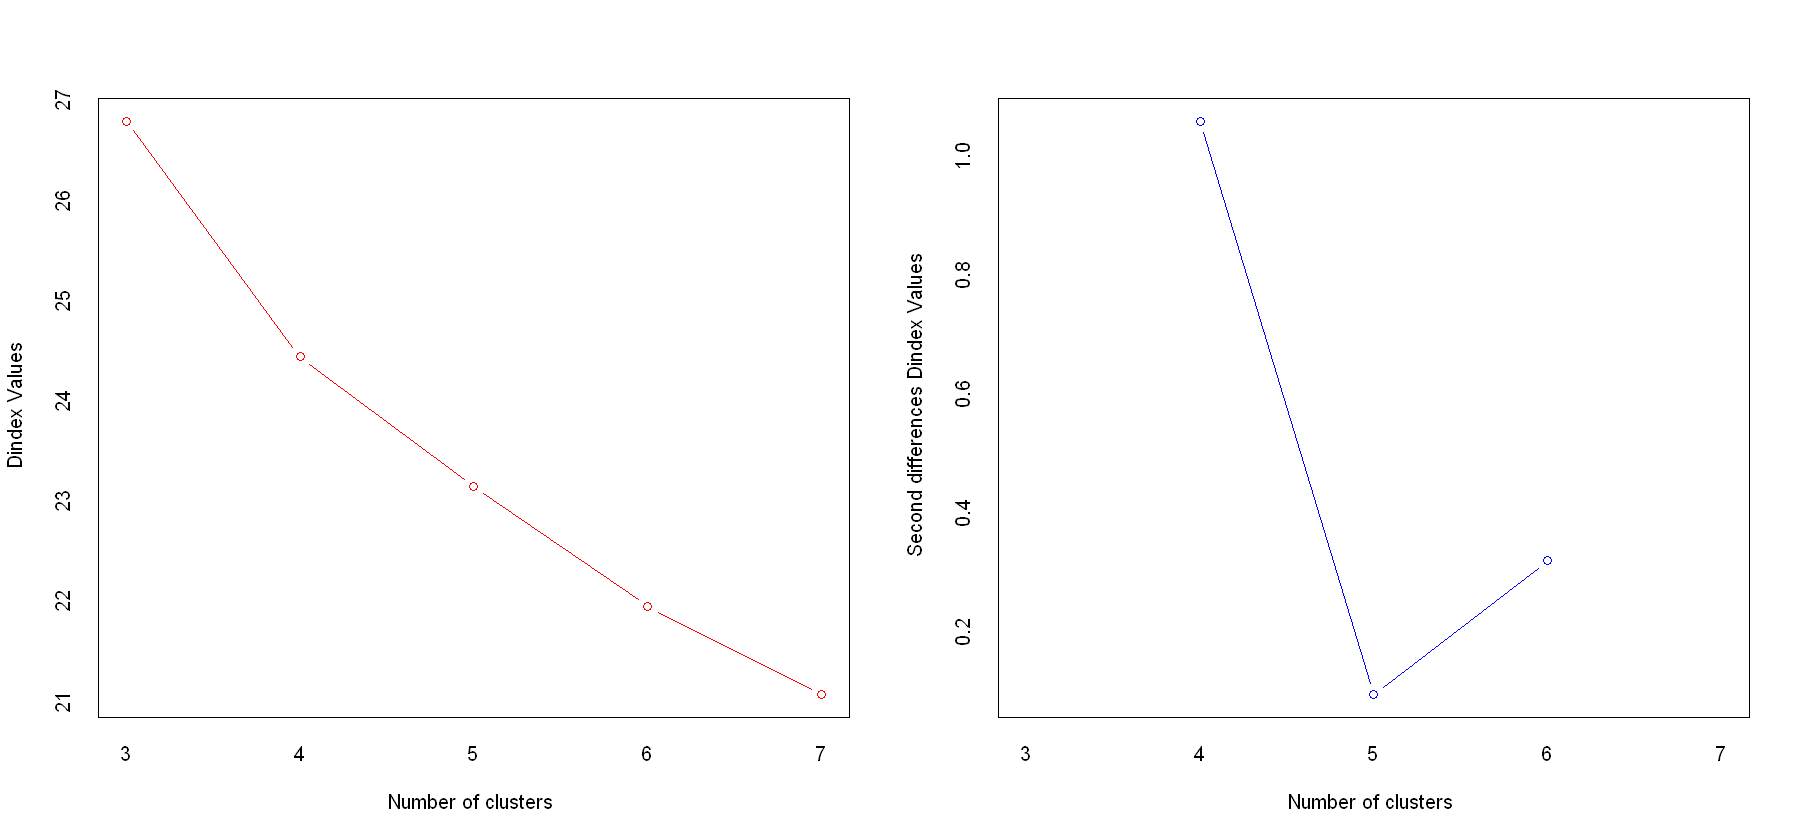

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


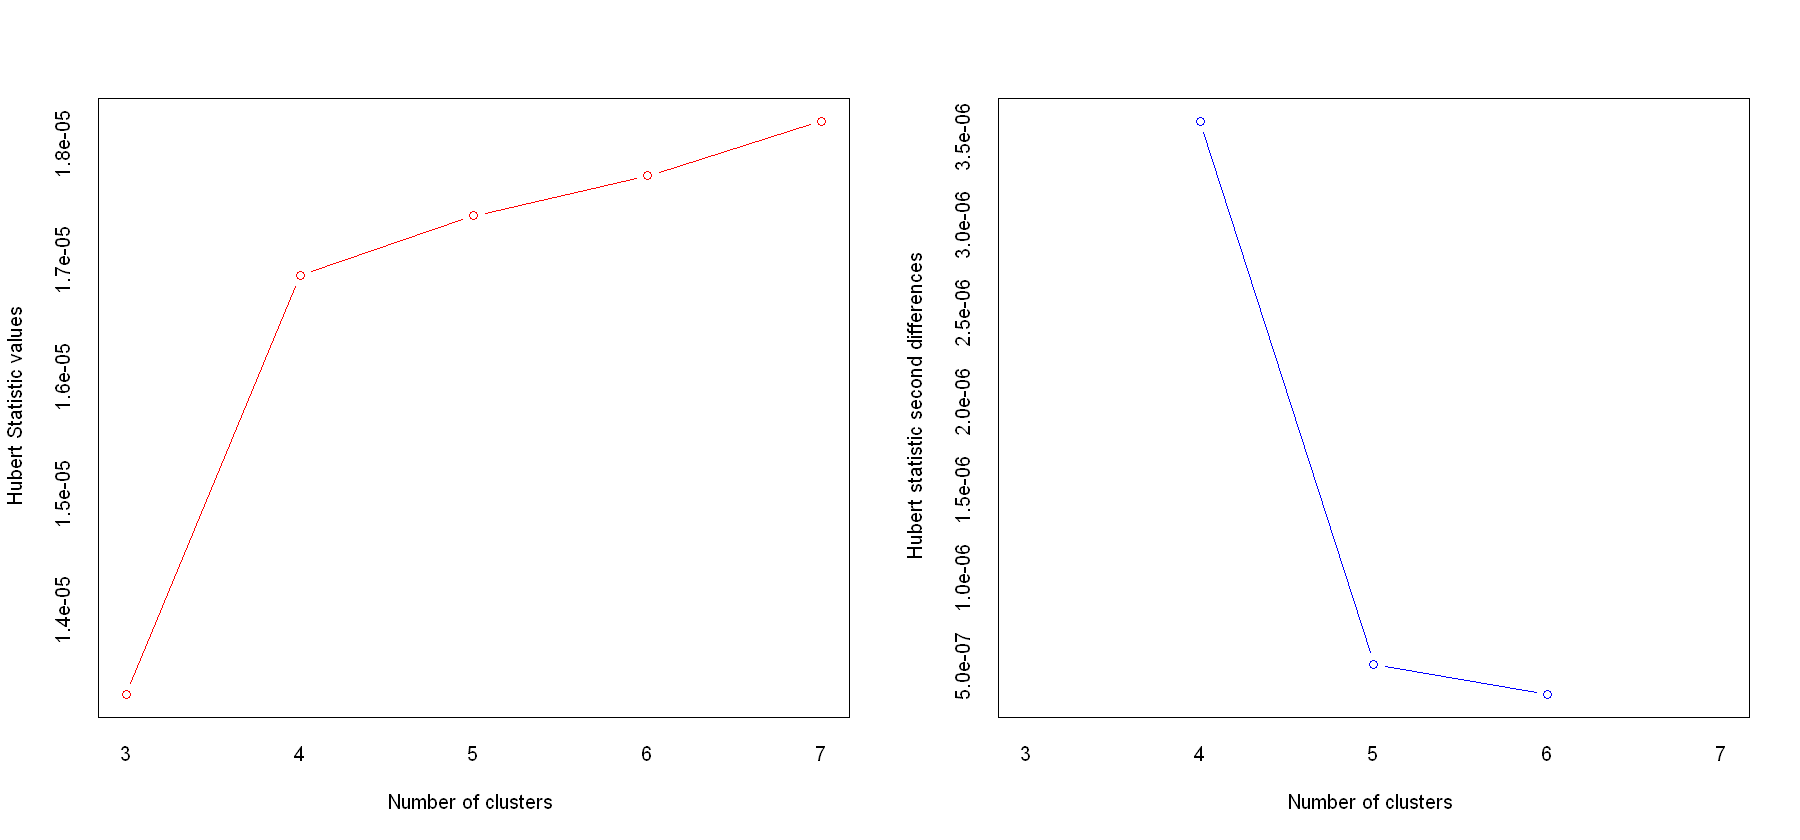

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 3 proposed 3 as the best number of clusters 
* 13 proposed 4 as the best number of clusters 
* 4 proposed 5 as the best number of clusters 
* 3 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
******************************************************************* 


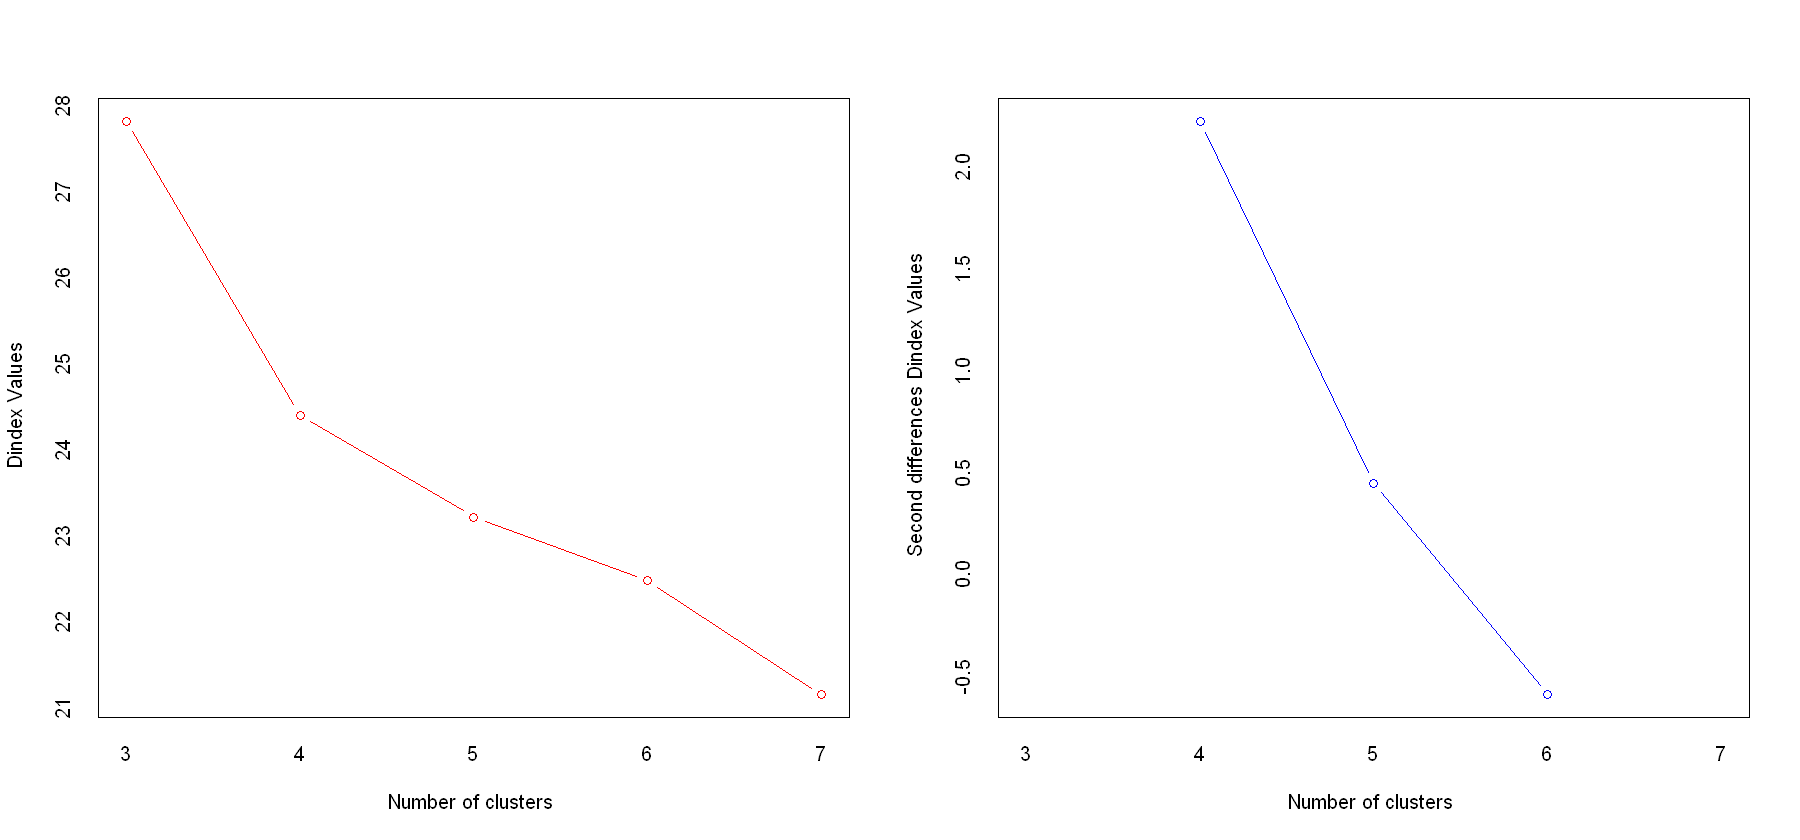

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


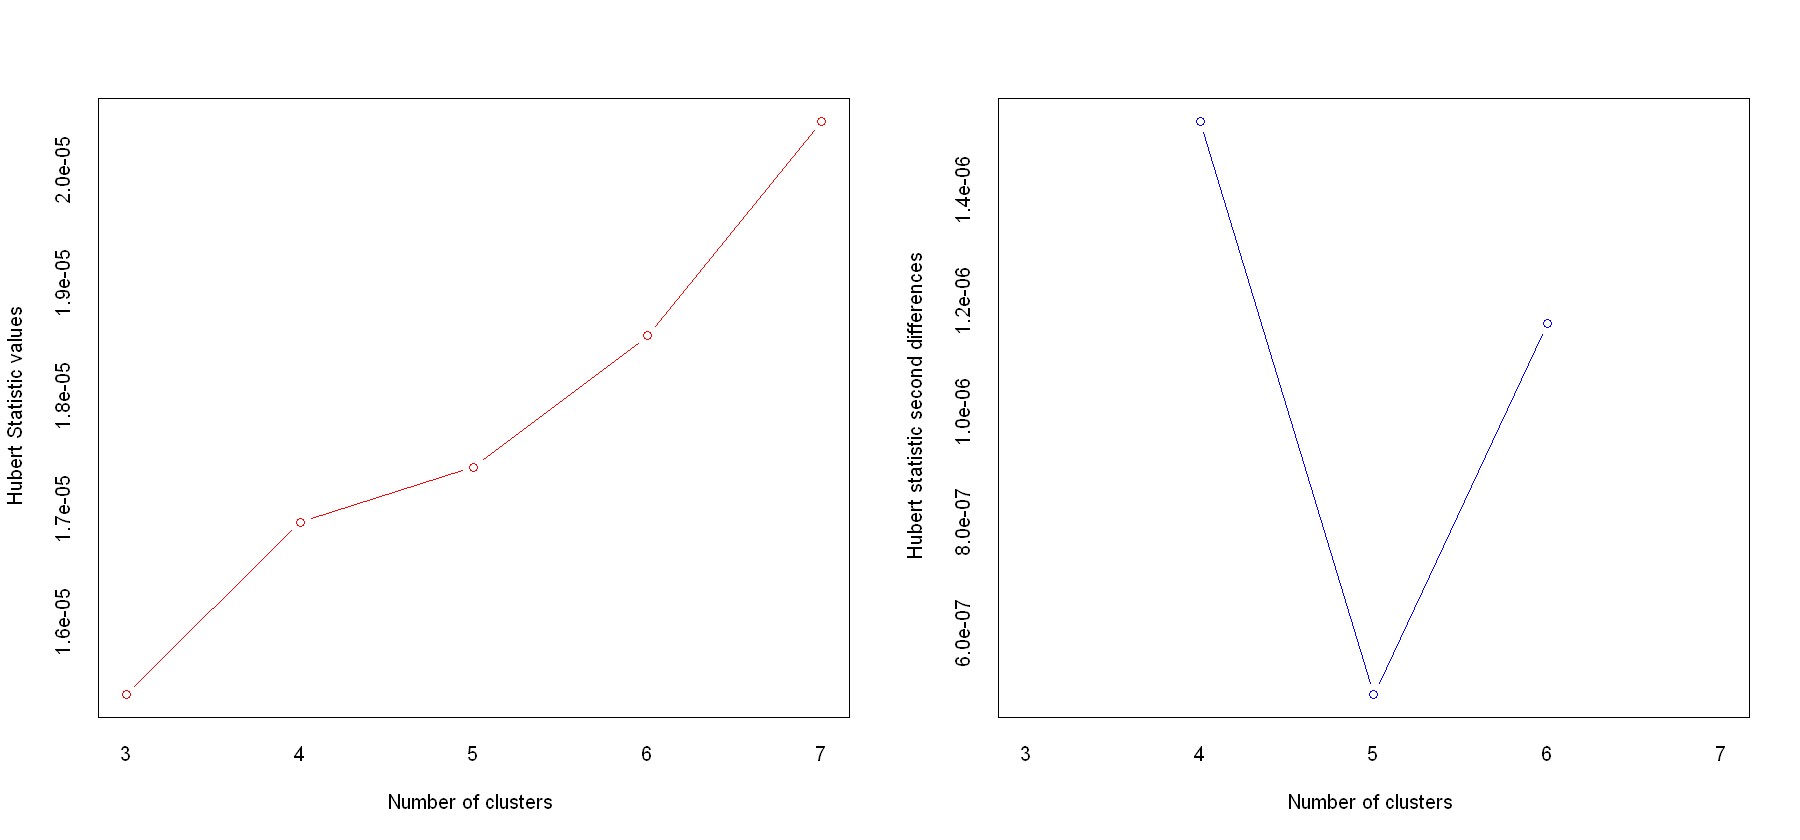

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 11 proposed 3 as the best number of clusters 
* 9 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 2 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


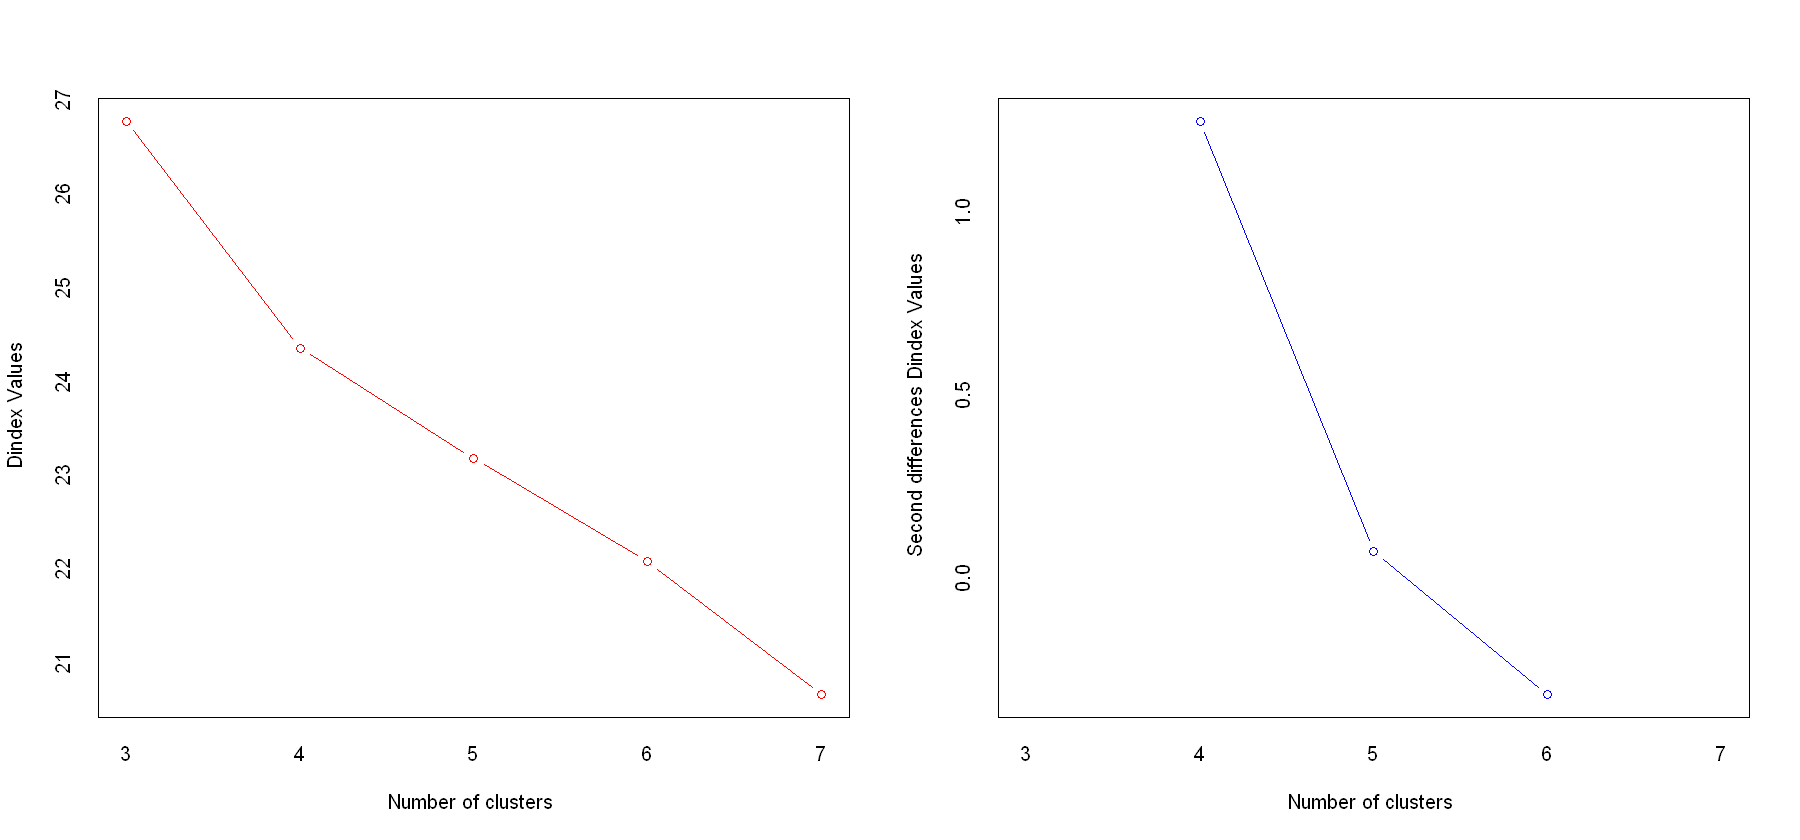

In [40]:
optimald2 = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "ward.D2", index = 'all',alphaBeale = 0.1)
optimald = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "ward.D", index = 'all',alphaBeale = 0.1)
optimalcomplete = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "complete", index = 'all',alphaBeale = 0.1)
optimal.kmeans = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "kmeans", index = 'all',alphaBeale = 0.1)



In [41]:
list(optimald2$Best.nc)
list(optimald$Best.nc)
list(optimalcomplete$Best.nc)
list(optimal.kmeans$Best.nc)

list(optimald2$All.index)
index.d2 <- optimald2$All.index[,c(1 , 3:4 , 10,17 )]



,KL,CH,Hartigan,CCC,Scott,Marriot,TrCovW,TraceW,Friedman,Rubin,...,Ratkowsky,Ball,PtBiserial,Frey,McClain,Dunn,Hubert,SDindex,Dindex,SDbw
Number_clusters,4.0000,3.0000,4.0000,4.0000,4.0000,4.000000e+00,4,4.00,7.000,4.0000,...,4.0000,4.000,3.0000,2,3.0000,7.0000,0,3.0000,0,7.000
Value_Index,2.4982,42.6449,8.9831,10.1879,95.8662,1.539656e+40,35931347,7052.41,20.322,-0.3977,...,0.2981,8757.195,0.5493,NA,0.9524,0.2374,0,0.0748,0,0.337


,KL,CH,Hartigan,CCC,Scott,Marriot,TrCovW,TraceW,Friedman,Rubin,...,Ratkowsky,Ball,PtBiserial,Frey,McClain,Dunn,Hubert,SDindex,Dindex,SDbw
Number_clusters,4.0000,3.0000,4.0000,4.0000,4.0000,4.00000e+00,4,4.000,7.0000,4.0000,...,4.0000,4.000,3.0000,2,3.0000,7.0000,0,3.000,0,7.0000
Value_Index,3.3397,42.6449,10.5255,10.1879,95.8662,1.78697e+40,35931347,7964.319,19.9228,-0.5121,...,0.2981,8757.195,0.5493,NA,0.9524,0.2341,0,0.075,0,0.3372


,KL,CH,Hartigan,CCC,Scott,Marriot,TrCovW,TraceW,Friedman,Rubin,...,Ratkowsky,Ball,PtBiserial,Frey,McClain,Dunn,Hubert,SDindex,Dindex,SDbw
Number_clusters,4.0000,4.0000,4.0000,4.0000,4.0000,4.000000e+00,4,4.00,5.0000,4.000,...,3.0000,4.00,4.0000,2,3.0000,7.0000,0,4.0000,0,7.0000
Value_Index,3.9093,41.2028,15.3369,10.3487,98.4243,1.772716e+40,52452802,11429.38,11.2087,-0.707,...,0.3193,10044.67,0.5258,NA,1.1688,0.2436,0,0.0744,0,0.3266


,KL,CH,Hartigan,CCC,Scott,Marriot,TrCovW,TraceW,Friedman,Rubin,...,Ratkowsky,Ball,PtBiserial,Frey,McClain,Dunn,Hubert,SDindex,Dindex,SDbw
Number_clusters,4.0000,3.0000,4.0000,4.0000,4.000,4.000000e+00,4,4.000,5.0000,4.000,...,3.0000,4.000,3.0000,2,3.0000,7.0000,0,3.0000,0,7.0000
Value_Index,3.0736,42.9217,10.8256,10.4483,95.337,1.535403e+40,36644755,8150.782,11.1565,-0.513,...,0.2948,8880.854,0.5549,NA,0.9698,0.2194,0,0.0759,0,0.3213


,KL,CH,Hartigan,CCC,Scott,Marriot,TrCovW,TraceW,Friedman,Rubin,...,Ratkowsky,Ball,Ptbiserial,Frey,McClain,Dunn,Hubert,SDindex,Dindex,SDbw
3,1.0954,42.6449,17.8481,9.0529,455.2341,5.711600e+40,72907780,66650.06,39.2911,4.4350,...,0.2932,22216.687,0.5493,0.6112,0.9524,0.1438,0,0.0748,26.7965,0.4134
4,2.4982,40.5963,8.8651,10.1879,551.1003,2.970734e+40,36976433,53837.97,45.3188,5.4904,...,0.2981,13459.493,0.5241,0.2645,1.7263,0.1707,0,0.0791,24.4445,0.3660
5,1.0227,35.8203,8.4557,8.8985,626.3224,1.769524e+40,28296319,48078.29,56.3242,6.1481,...,0.2802,9615.658,0.5268,0.6674,1.9006,0.2185,0,0.0824,23.2460,0.3576
6,1.2929,33.2055,6.8944,8.8379,696.1687,1.040695e+40,22522539,43087.41,64.0359,6.8602,...,0.2700,7181.235,0.5006,0.2883,2.3256,0.2185,0,0.0808,21.9190,0.3421
7,1.5614,31.0330,4.9287,9.0608,780.7946,4.786635e+39,18974533,39322.08,84.3580,7.5172,...,0.2645,5617.441,0.4910,0.6677,2.7416,0.2374,0,0.0898,21.0405,0.3370


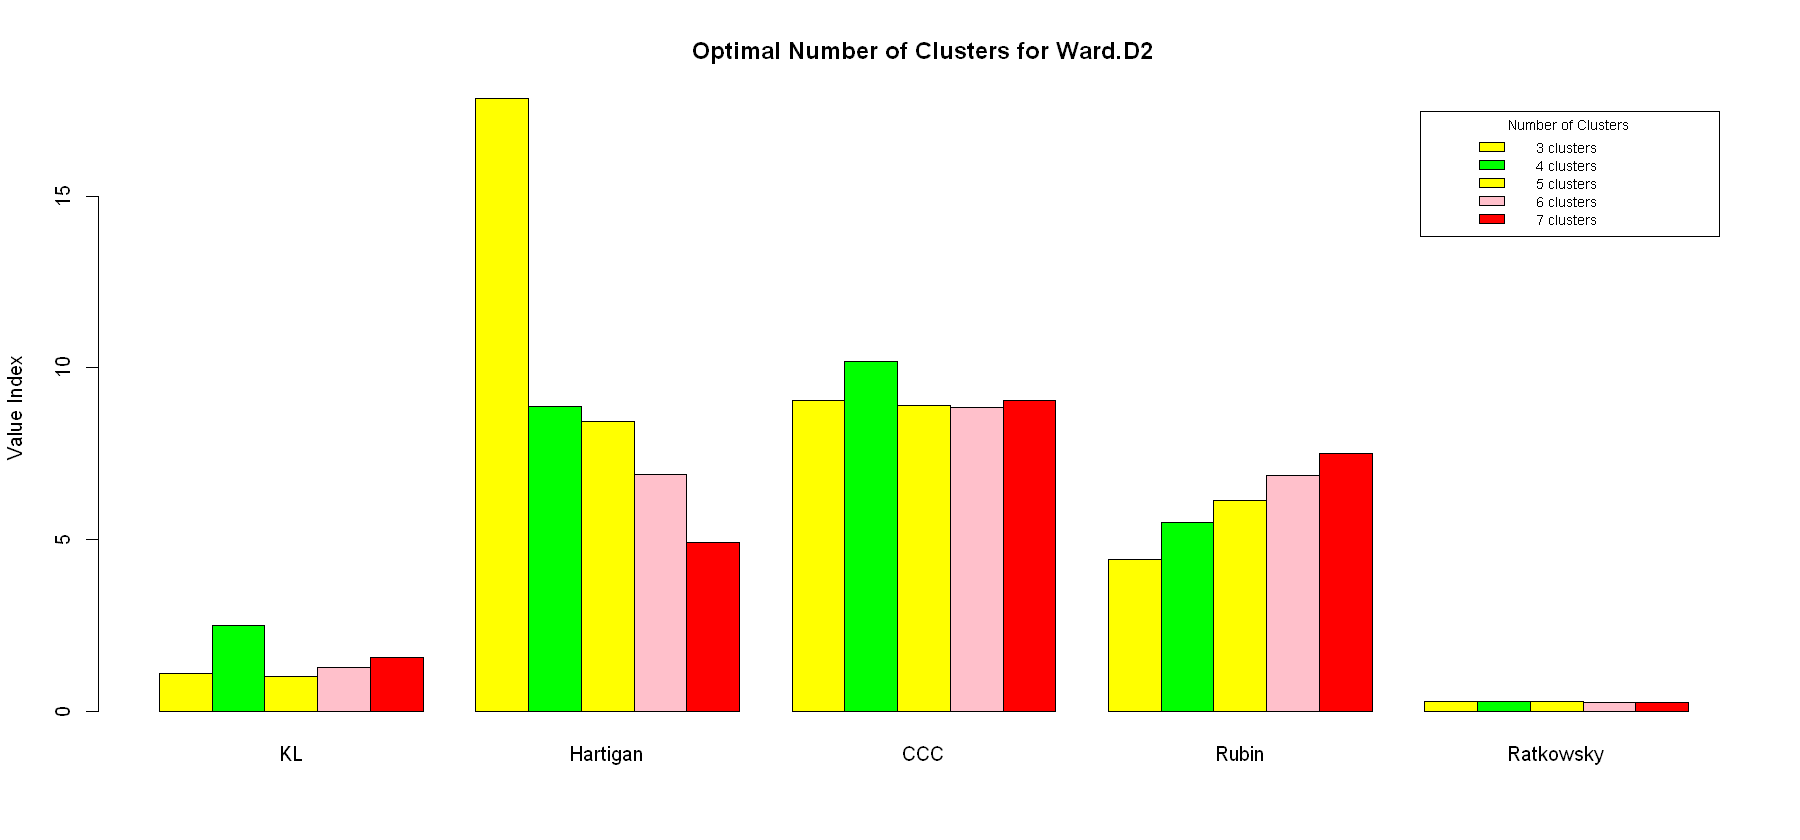

In [42]:
barplot(index.d2, beside = TRUE, main = "Optimal Number of Clusters for Ward.D2",
        col = c("yellow", "green", "yellow","pink","red"),
        ylab = "Value Index", legend = c("3 clusters", "4 clusters", "5 clusters","6 clusters","7 clusters"), 
        args.legend = list(title = "Number of Clusters", cex = .7))

Cutting at different tree levels 4 which is the optimal for Ward.D2

In [43]:
dfsimple$clusters4 <- cutree(hc.ward2,4)
dfsimple$clusters4
clusters_wa <- cutree(hc.ward2,4)

[1] 1 2 3 2 4 1 1 4 2 1 3 4 1 3 1 2 4 3 3 1 4 2 3 3 3 4 3 1 4 1 4 3 2 1 4 2 2 3
[39] 4 3 1 3 1 4 1 3 4 2 3 1 4 1 4 1 1 1 3 4 2 4 3 3 4 3 2 4 3 4 1 2 4 1 2 2 4 4
[77] 1 1

Fancy Clustering Graph Majority

In [1]:
dend <- as.dendrogram(hc.ward2 )
dend <- color_branches(dend, k=4, col = c("#a6cee3",  "#1f78b4",  "#b2df8a",  "#33a02c"))
labels(dend) <- df1$Country[hc.ward2$order]
options(repr.plot.width=17, repr.plot.height=7)
par(mar = c(12,10,7,7))
par(cex=1)
plot(dend, main="Cluster Dendrogram", xlab="height", 
     ylab="",horiz=FALSE )


df.wa.d2.avg <- mutate(df.wa, cluster = clusters_wa)
count(df.wa.d2.avg, cluster)

sapply(unique(clusters_wa),function(g)dfsimple$Country[clusters_wa == g])

dend <- as.dendrogram(hc.ward)
dend <- color_branches(dend, k=4)
labels(dend) <- df1$Country[hc.ward$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries(Ward.D)", xlab="", 
     ylab="", cex=.5,  )

dend <- as.dendrogram(hc.complete)
dend <- color_branches(dend, k=4)
labels(dend) <- df1$Country[hc.complete$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries(Complete)", xlab="", 
     ylab="", cex=.5,  )

ERROR: Error in as.dendrogram(hc.ward2): object 'hc.ward2' not found


# K-Mean Clustering in R

List of 9
 $ cluster     : int [1:78] 2 1 2 1 1 2 2 1 1 2 ...
 $ centers     : num [1:2, 1:11] 6.32 16.41 3.26 20.55 1.58 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:11] "ptap" "bore" "pspr" "uspr" ...
 $ totss       : num 142444
 $ withinss    : num [1:2] 37823 45626
 $ tot.withinss: num 83448
 $ betweenss   : num 58996
 $ size        : int [1:2] 36 42
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


K-means clustering with 2 clusters of sizes 36, 42

Cluster means:
       ptap      bore     pspr      uspr     pwel      uwel     surw     tles
1  6.319444  3.261111 1.580556 0.8305556 3.863889  2.722222 2.730556 12.17500
2 16.414286 20.550000 4.454762 6.0476190 8.414286 10.333333 7.176190 50.03333
       tmor     rain      phom
1  2.241667 4.355556 35.494444
2 15.435714 1.038095  5.654762

Clustering vector:
 [1] 2 1 2 1 1 2 2 1 1 2 2 1 2 2 2 1 1 2 2 2 1 1 2 2 2 1 2 2 1 2 1 2 1 2 1 1 1 2
[39] 1 2 2 2 2 1 2 2 1 1 2 2 1 2 1 2 2 2 2 1 1 1 2 2 1 2 1 1 2 1 2 1 1 2 1 1 1 1
[77] 2 2

Within cluster sum of squares by cluster:
[1] 37822.56 45625.94
 (between_SS / total_SS =  41.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

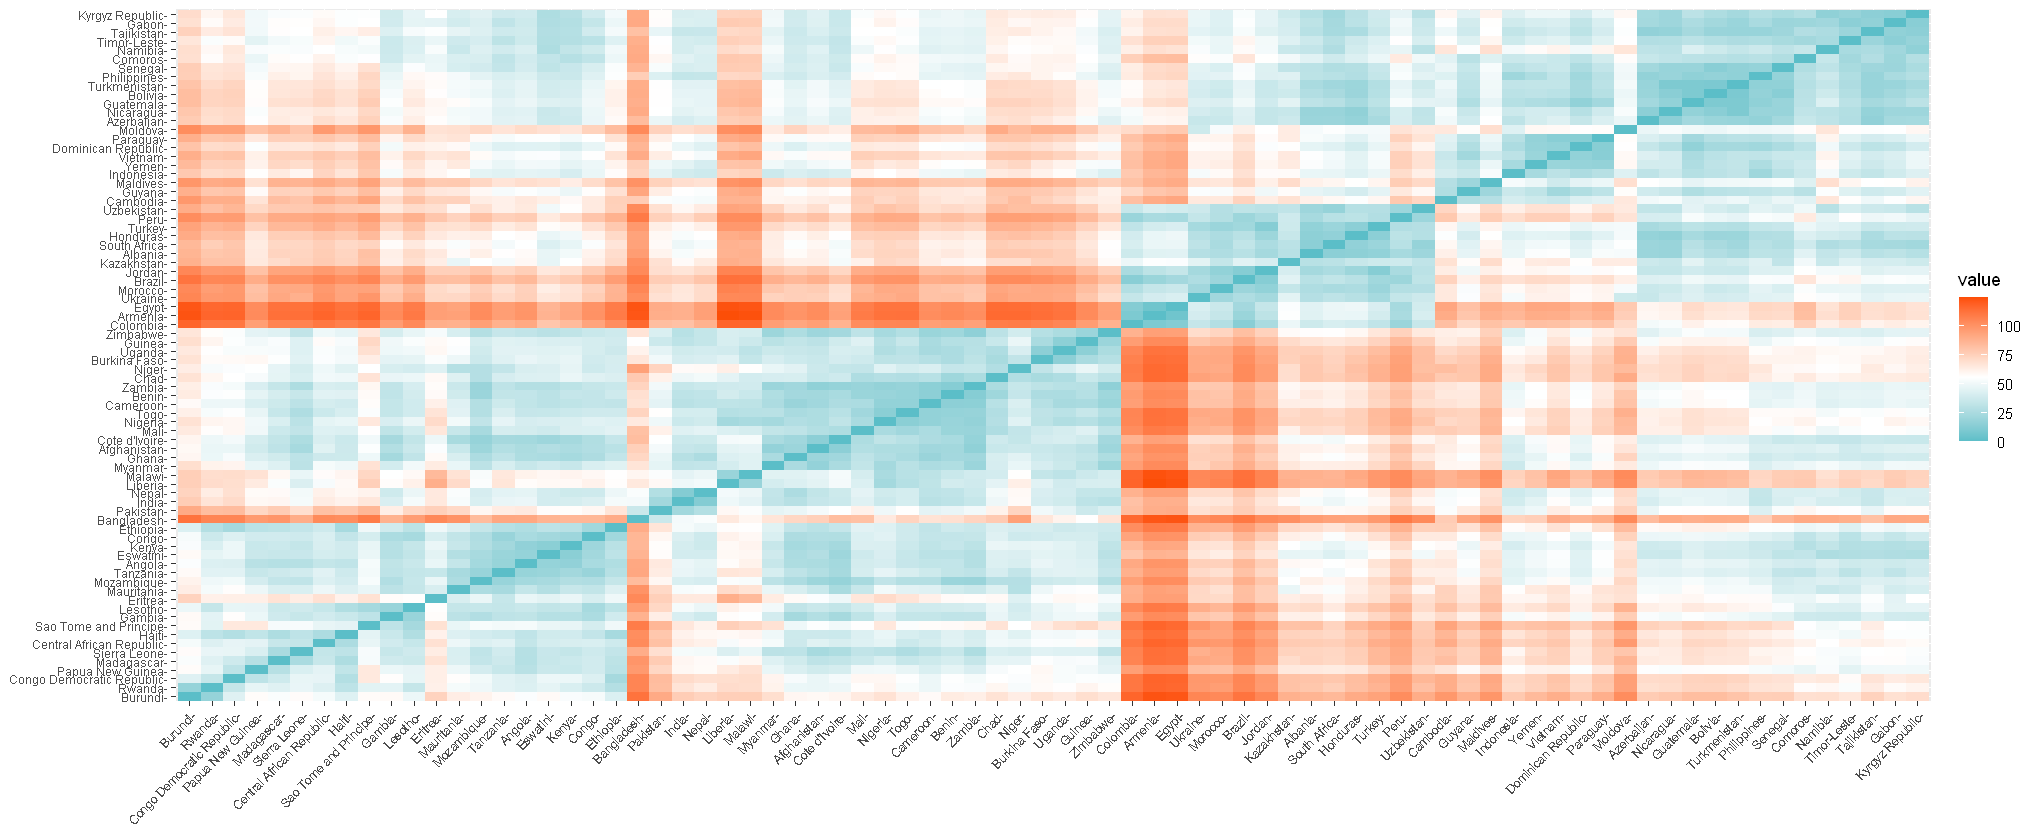

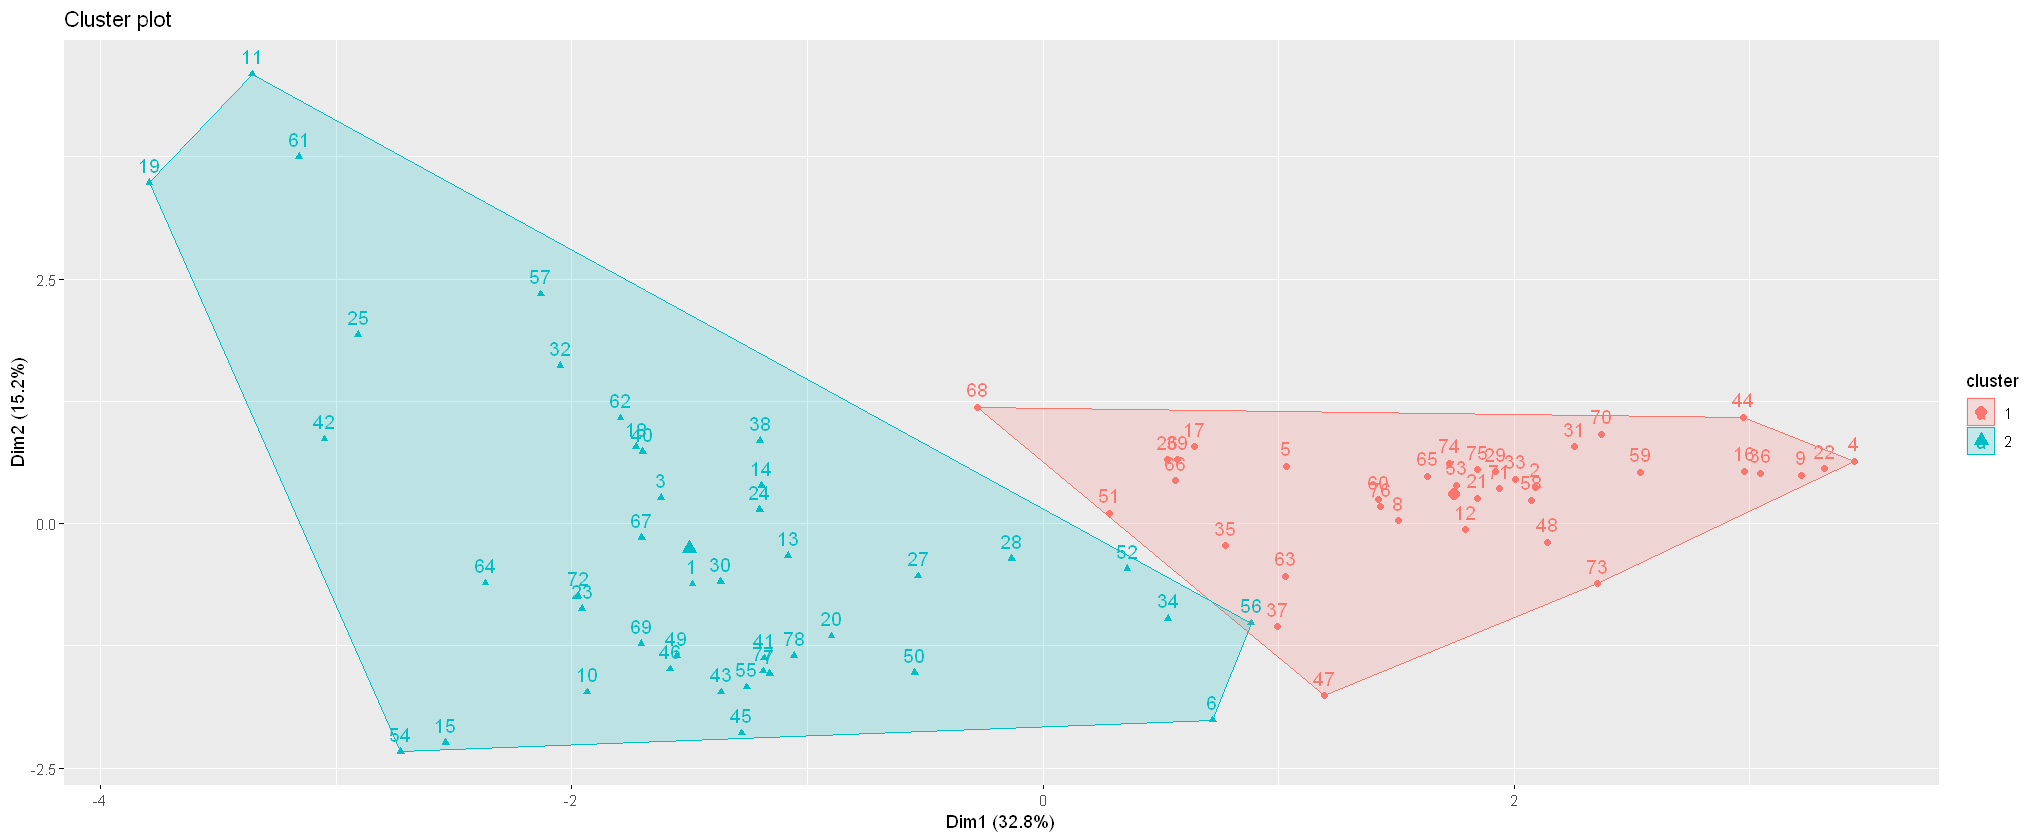

List of 9
 $ cluster     : int [1:78] 3 2 3 2 1 1 3 1 2 3 ...
 $ centers     : num [1:3, 1:11] 8.02 4.56 16.96 12.27 1.03 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:11] "ptap" "bore" "pspr" "uspr" ...
 $ totss       : num 142444
 $ withinss    : num [1:3] 25804 6409 34151
 $ tot.withinss: num 66364
 $ betweenss   : num 76081
 $ size        : int [1:3] 26 14 38
 $ iter        : int 3
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


K-means clustering with 3 clusters of sizes 26, 14, 38

Cluster means:
       ptap      bore     pspr      uspr     pwel      uwel     surw      tles
1  8.023077 12.269231 1.846154 1.1653846 4.323077  2.330769 3.023077 15.650000
2  4.564286  1.028571 0.850000 0.1785714 2.421429  3.157143 1.807143  9.635714
3 16.957895 17.028947 4.844737 6.6078947 9.110526 11.242105 7.784211 52.576316
       tmor      rain      phom
1  2.900000 5.7769231 17.661538
2  1.142857 0.5214286 61.928571
3 16.778947 1.1289474  4.976316

Clustering vector:
 [1] 3 2 3 2 1 1 3 1 2 3 3 1 3 3 3 2 1 3 3 3 1 2 3 3 3 1 3 3 1 3 1 3 2 1 1 2 2 3
[39] 1 3 3 3 3 1 3 3 1 2 3 3 1 1 1 3 3 1 3 1 2 1 3 3 1 3 2 1 3 1 3 2 1 3 2 2 1 1
[77] 3 3

Within cluster sum of squares by cluster:
[1] 25803.965  6409.125 34150.510
 (between_SS / total_SS =  53.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

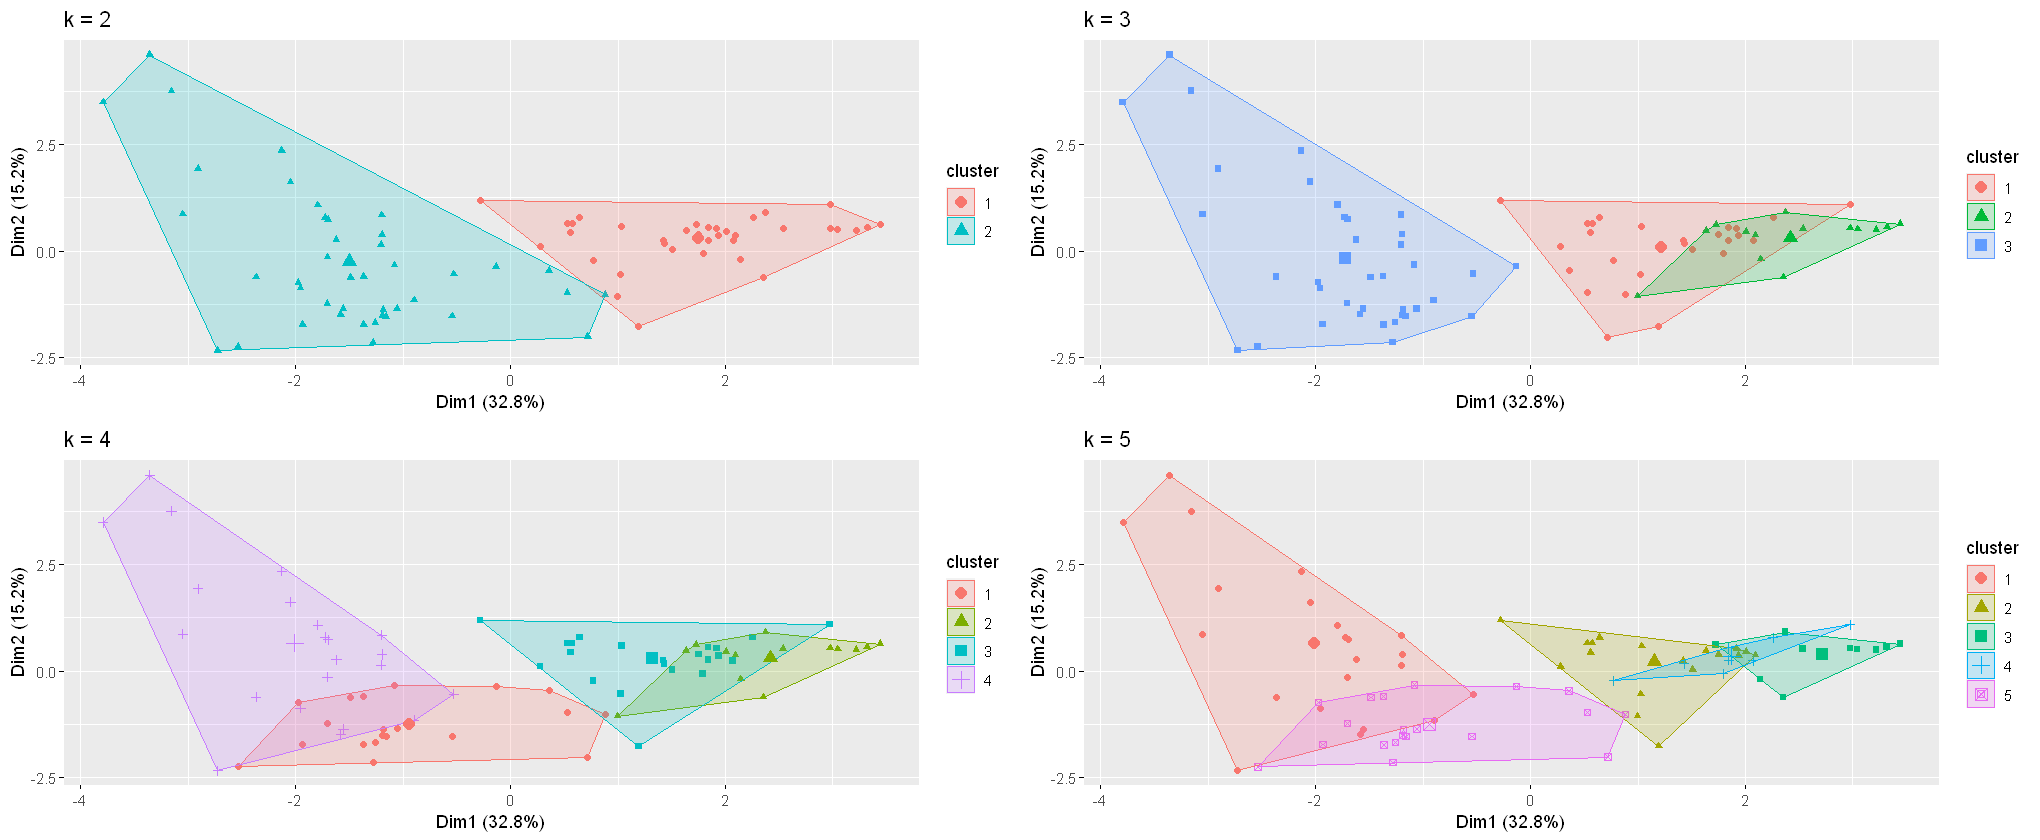

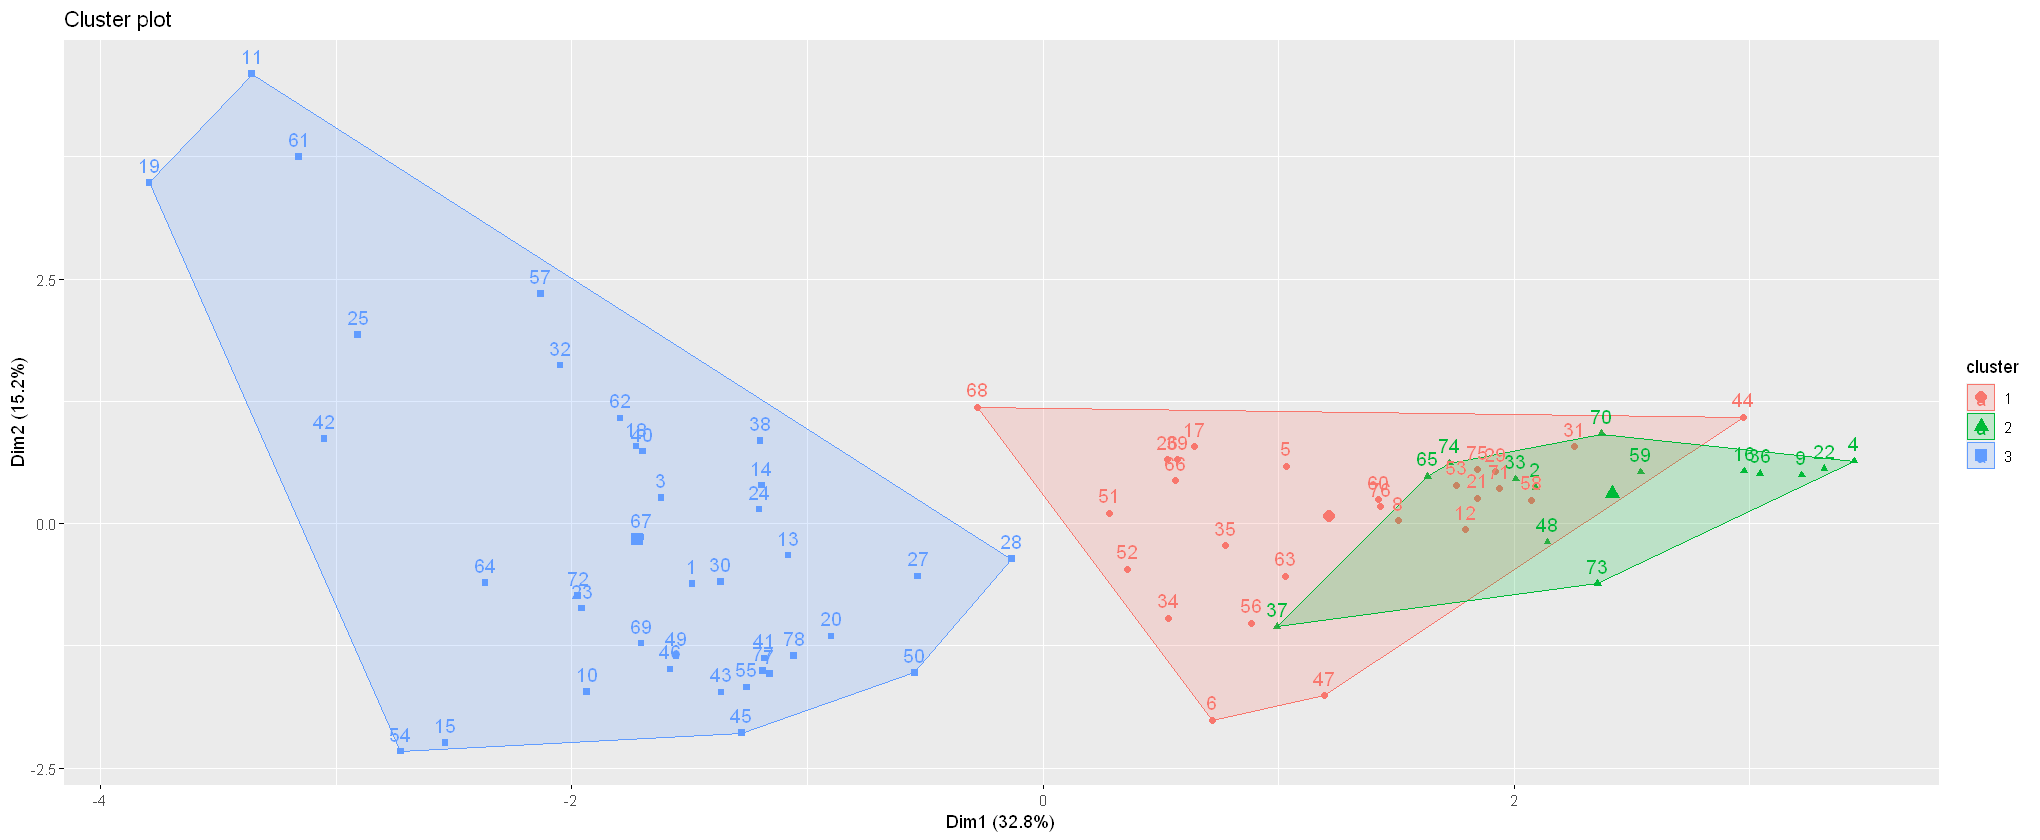

In [45]:
distance <- get_dist(df.wa)
labels(distance) <- df1$Country
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high="#FC4E07"), lab_size = 7 )
k2 <- kmeans(df.wa, centers = 2, nstart = 25)
str(k2)
k2
fviz_cluster(k2, data = df.wa ,  )
# it is often advantageous to use several different values of k and examine the differences in the results.
# We can execute the same process for 3, 4, and 5 clusters, and the results are shown in the figure:
k3 <- kmeans(df.wa, centers = 3, nstart = 25)
k4 <- kmeans(df.wa, centers = 4, nstart = 25)
k5 <- kmeans(df.wa, centers = 5, nstart = 25)

# plots to compare
p1 <- fviz_cluster(k2, geom = "point", data = df.wa) + ggtitle("k = 2")
p2 <- fviz_cluster(k3, geom = "point",  data = df.wa) + ggtitle("k = 3")
p3 <- fviz_cluster(k4, geom = "point",  data = df.wa) + ggtitle("k = 4")
p4 <- fviz_cluster(k5, geom = "point",  data = df.wa) + ggtitle("k = 5")
grid.arrange(p1, p2, p3, p4, nrow = 2)
str(k3)
k3
fviz_cluster(k3, data = df.wa ,  )

# Gap Stat Method

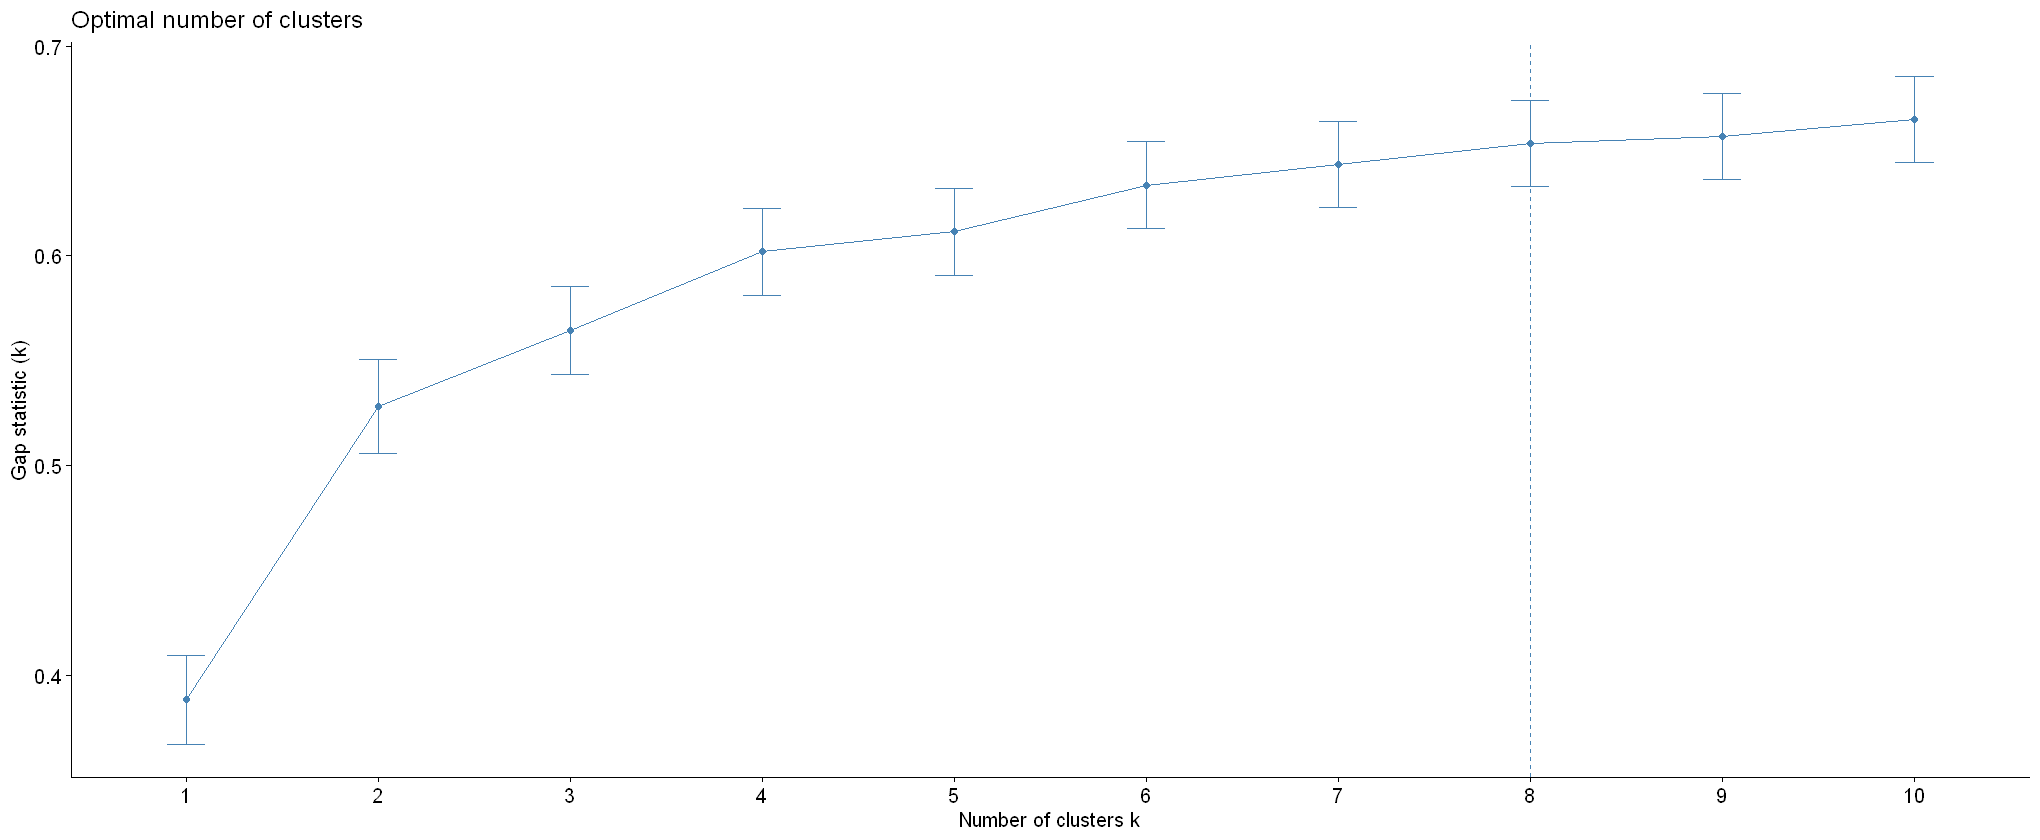

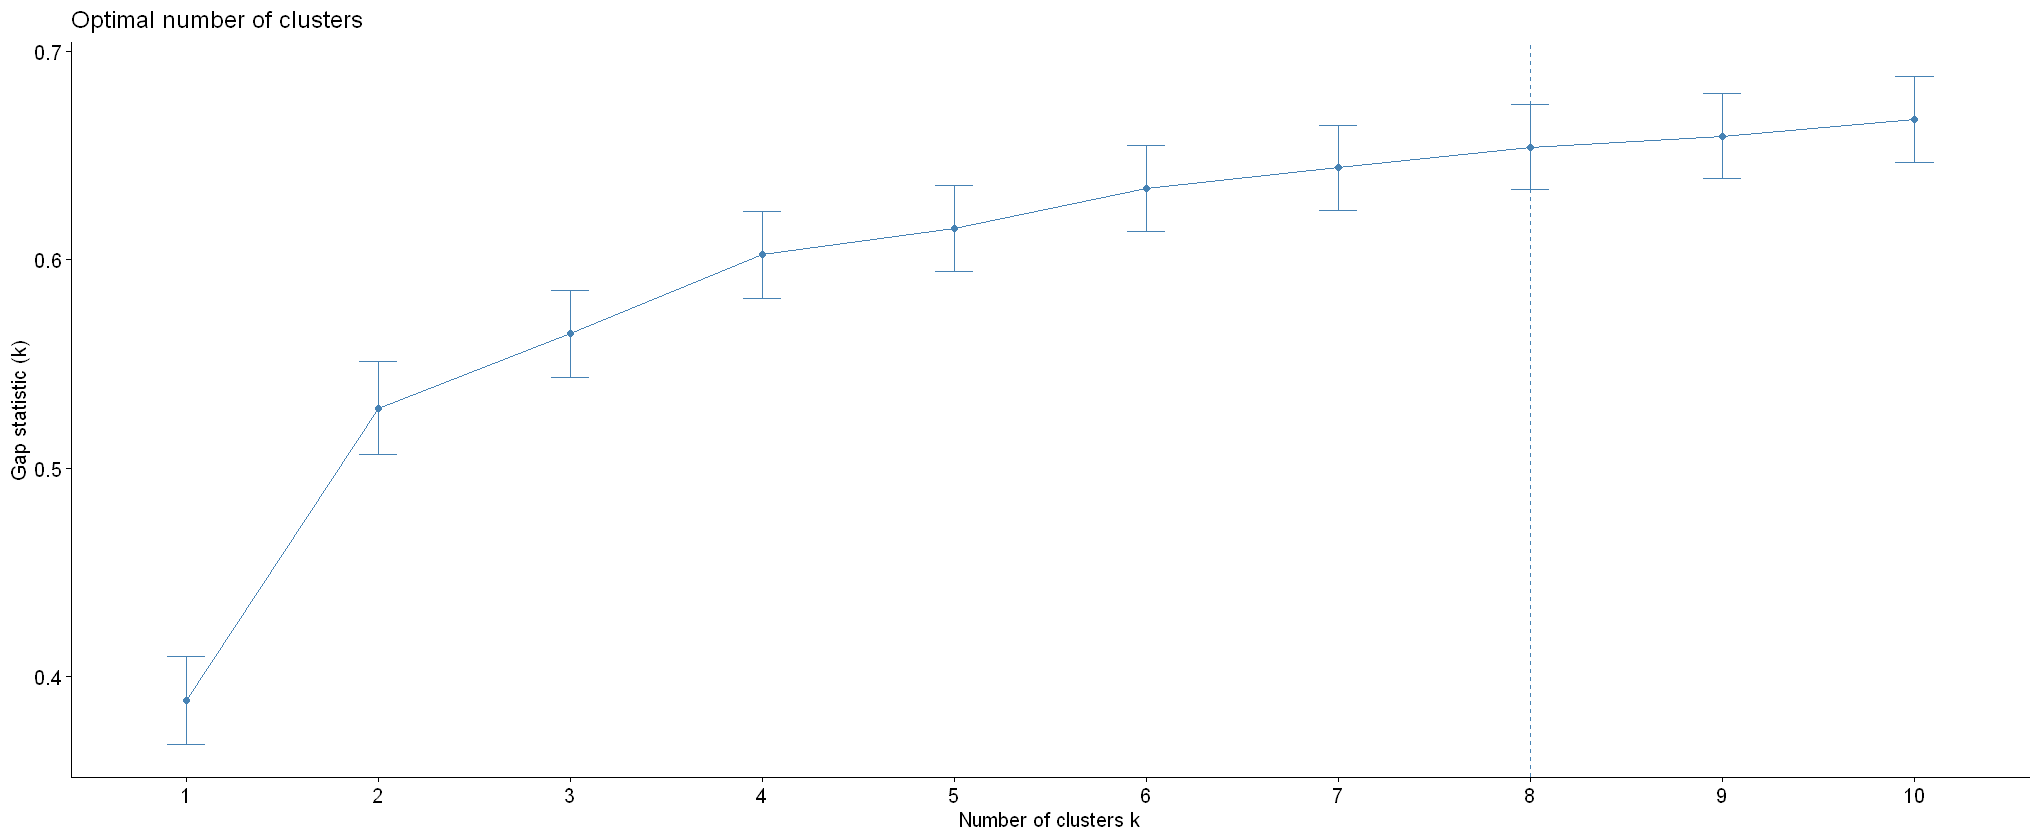

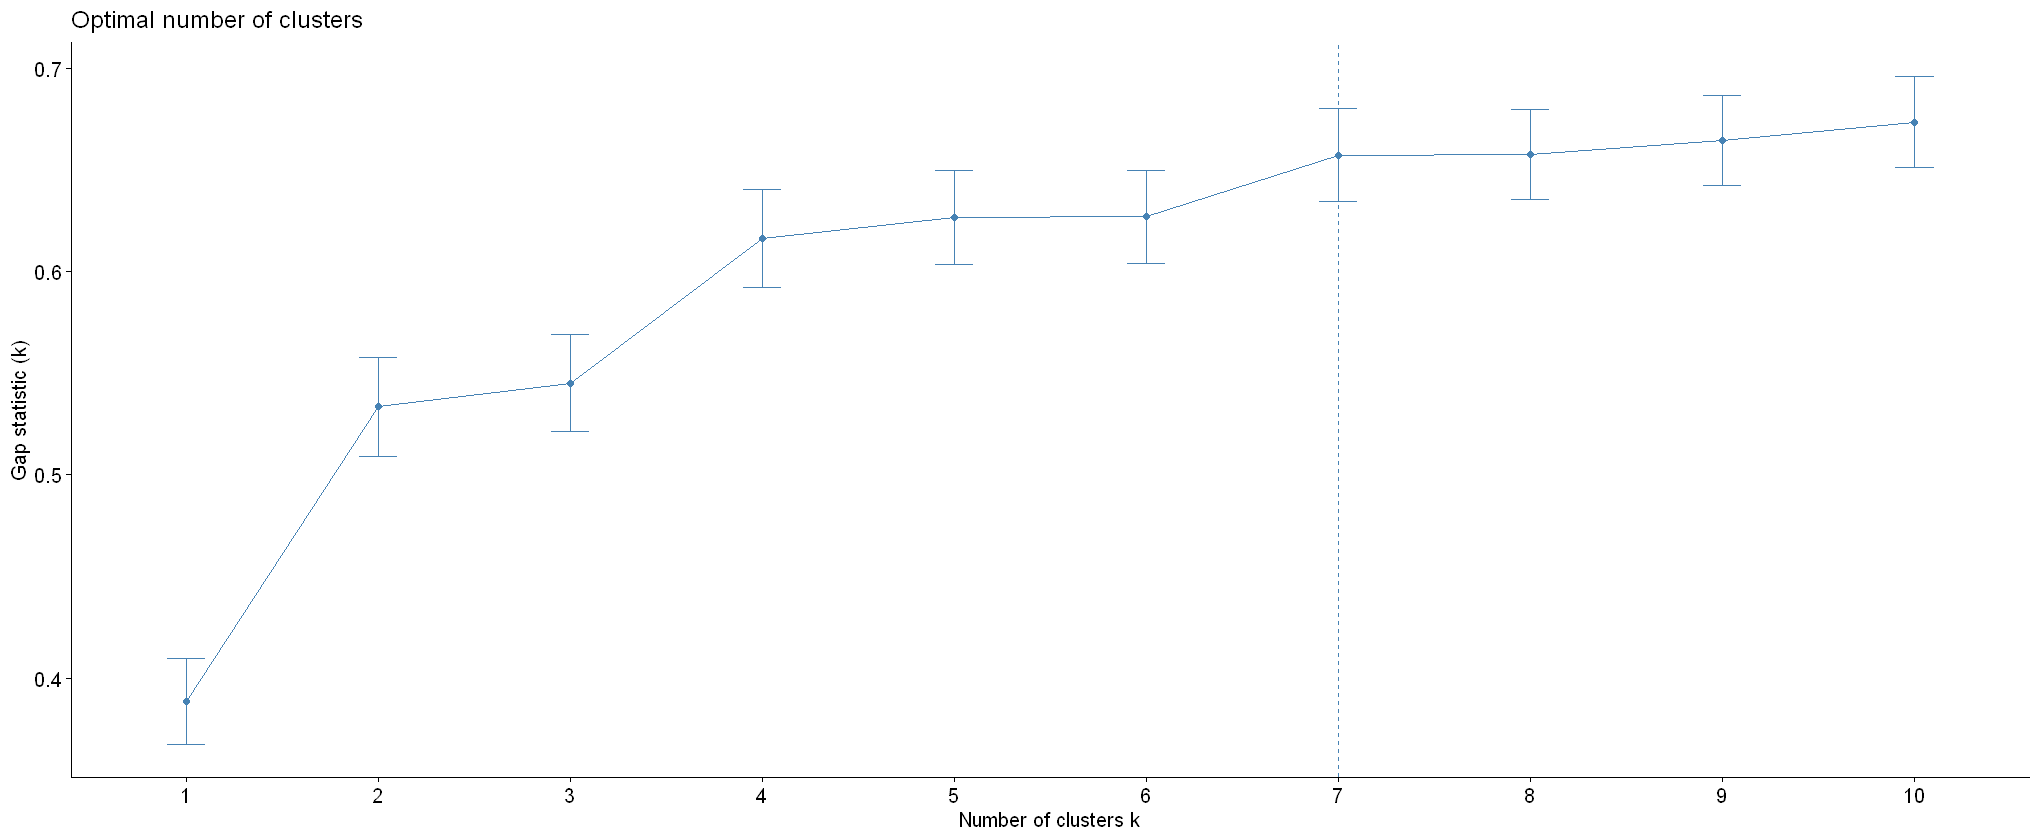

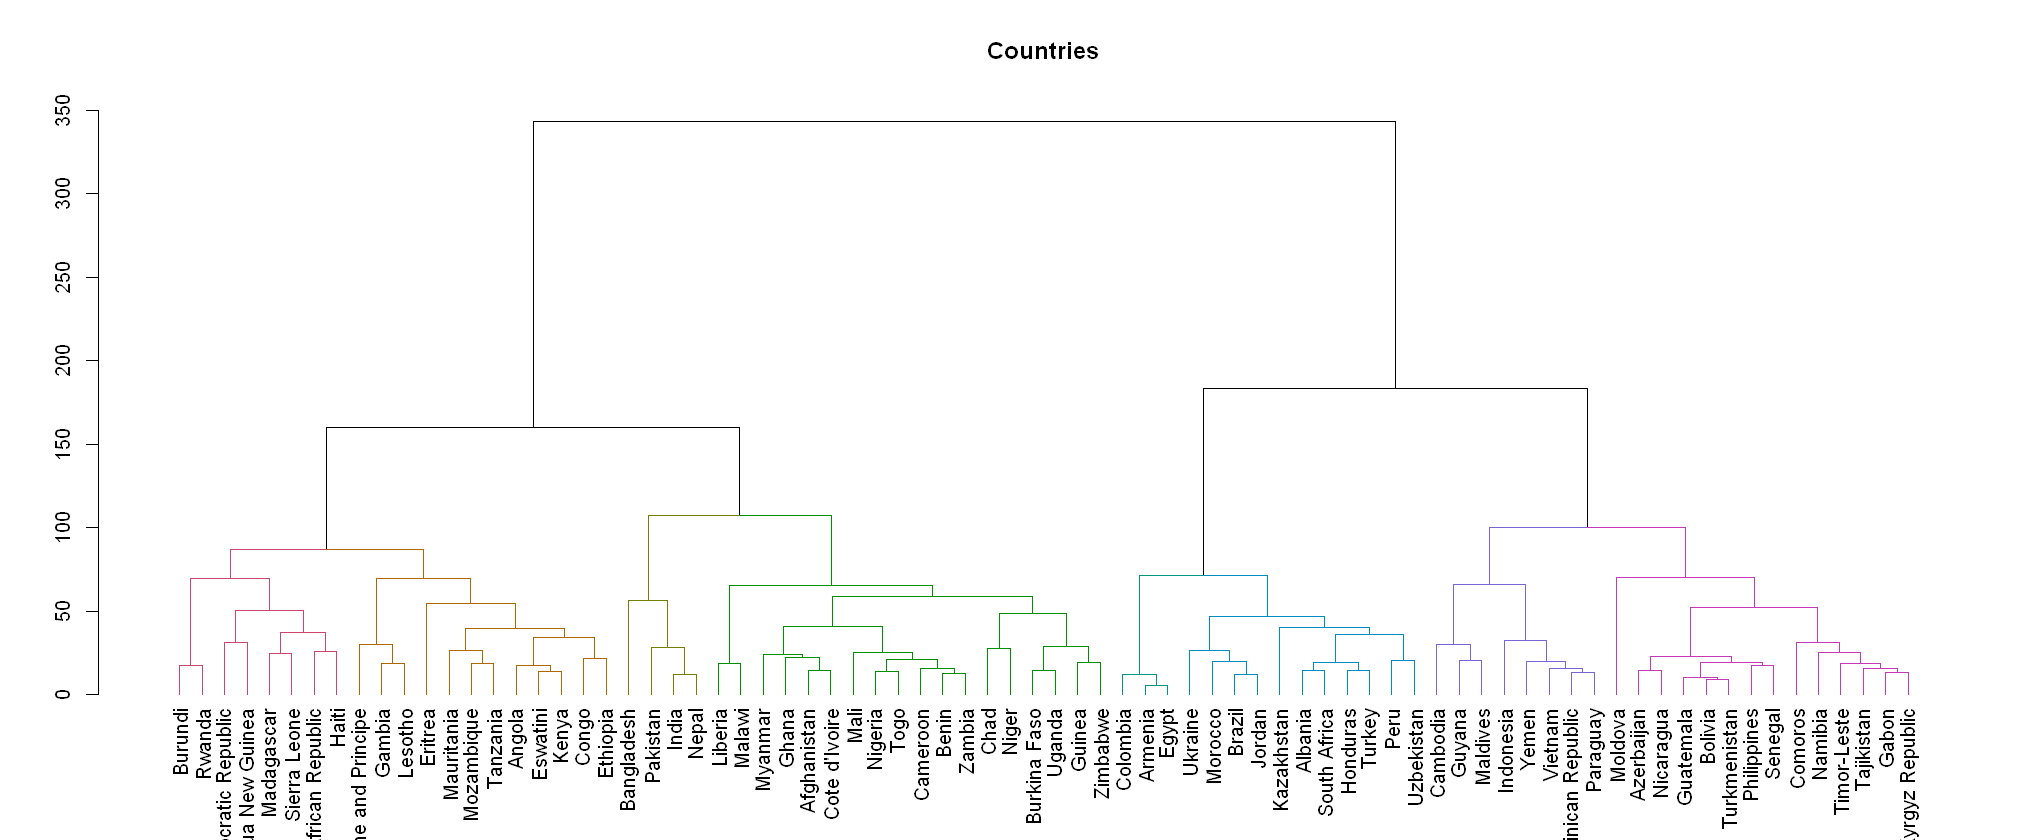

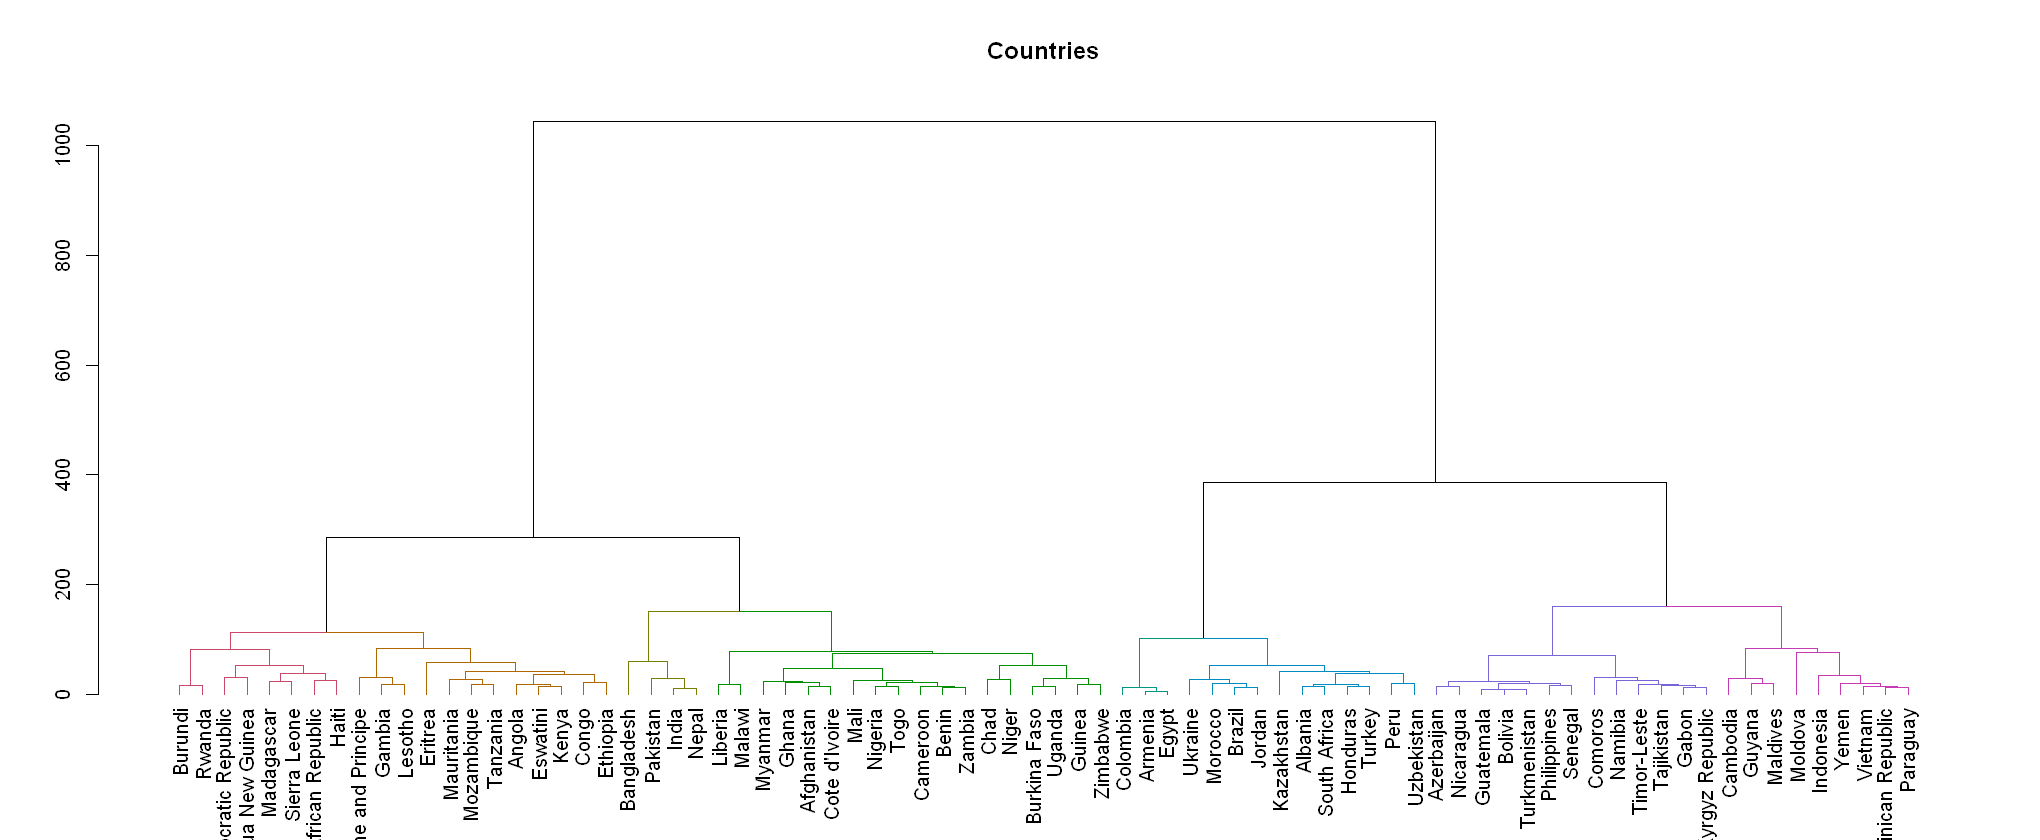

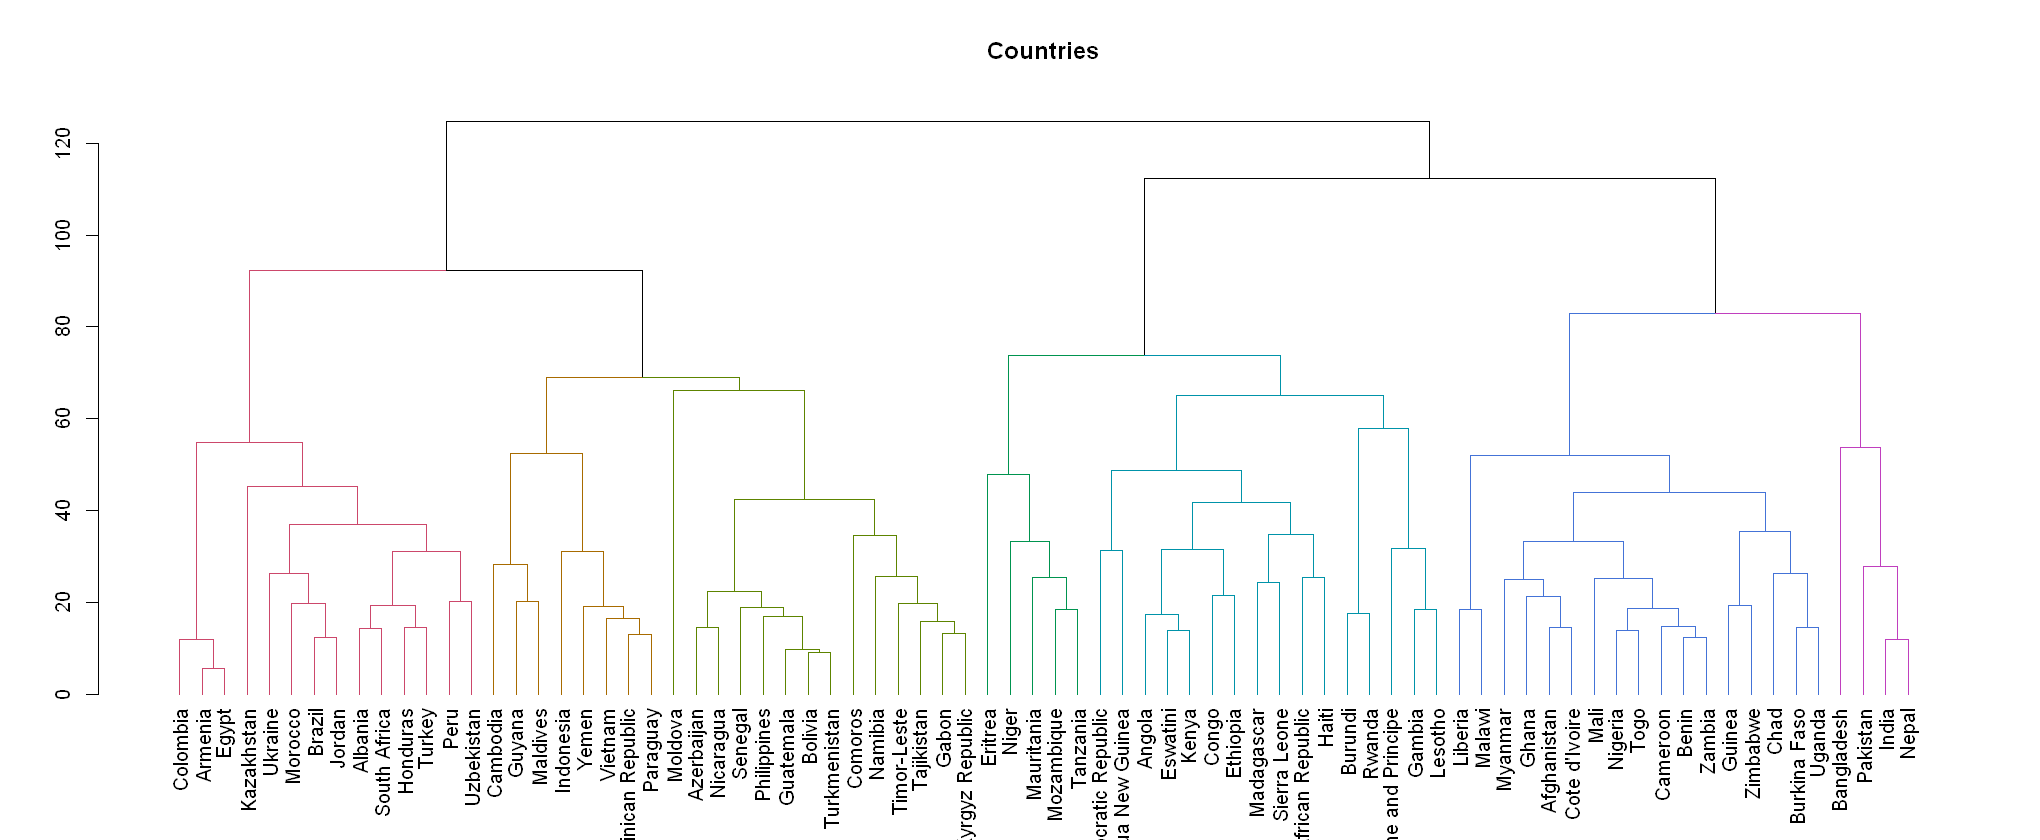

In [46]:
set.seed(123)
gap_stat <- clusGap(df.wa, hcut, hc_method ="ward.D2" ,
                    K.max = 10, B = 1000,  method = c('Tibs2001SEmax'))
fviz_gap_stat(gap_stat)


set.seed(123)
gap_stat <- clusGap(df.wa, hcut, hc_method ="ward.D" ,
                    K.max = 10, B = 1000, method ='Tibs2001SEmax')
fviz_gap_stat(gap_stat)
set.seed(123)
gap_stat <- clusGap(df.wa, hcut, hc_method ="complete" ,
                    K.max = 10, B = 1000)
fviz_gap_stat(gap_stat)
### Fancy Clustering Graph for WARD D2 Gap ### 
dend <- as.dendrogram(hc.ward2)
dend <- color_branches(dend, k=8)

labels(dend) <- df1$Country[hc.ward2$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries", xlab="", 
     ylab="", cex=.3,  )

### Ward Gap ###
dend <- as.dendrogram(hc.ward)
dend <- color_branches(dend, k=8)

labels(dend) <- df1$Country[hc.ward$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries", xlab="", 
     ylab="", cex=.3,  )

### Complete Gap ###
dend <- as.dendrogram(hc.complete)
dend <- color_branches(dend, k=7)

labels(dend) <- df1$Country[hc.complete$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries", xlab="", 
     ylab="", cex=.3,  )

# Histogram of the 11 Water Accessibility variables

      ptap            bore            pspr             uspr       
 Min.   : 0.10   Min.   : 0.00   Min.   : 0.000   Min.   : 0.100  
 1st Qu.: 3.20   1st Qu.: 1.90   1st Qu.: 0.400   1st Qu.: 0.700  
 Median :10.90   Median : 9.60   Median : 1.900   Median : 1.800  
 Mean   :12.56   Mean   :16.34   Mean   : 4.136   Mean   : 4.981  
 3rd Qu.:18.00   3rd Qu.:28.30   3rd Qu.: 4.850   3rd Qu.: 6.100  
 Max.   :57.70   Max.   :86.40   Max.   :47.900   Max.   :36.300  
 NA's   :5       NA's   :18      NA's   :19       NA's   :21      
      pwel             uwel             surw             tles      
 Min.   : 0.200   Min.   : 0.000   Min.   : 0.000   Min.   : 0.40  
 1st Qu.: 2.250   1st Qu.: 1.400   1st Qu.: 1.775   1st Qu.:19.15  
 Median : 5.600   Median : 5.400   Median : 5.050   Median :39.00  
 Mean   : 7.817   Mean   : 8.185   Mean   : 5.710   Mean   :35.77  
 3rd Qu.:10.200   3rd Qu.:11.700   3rd Qu.: 8.050   3rd Qu.:51.90  
 Max.   :48.100   Max.   :33.000   Max.   :19.200   Max.

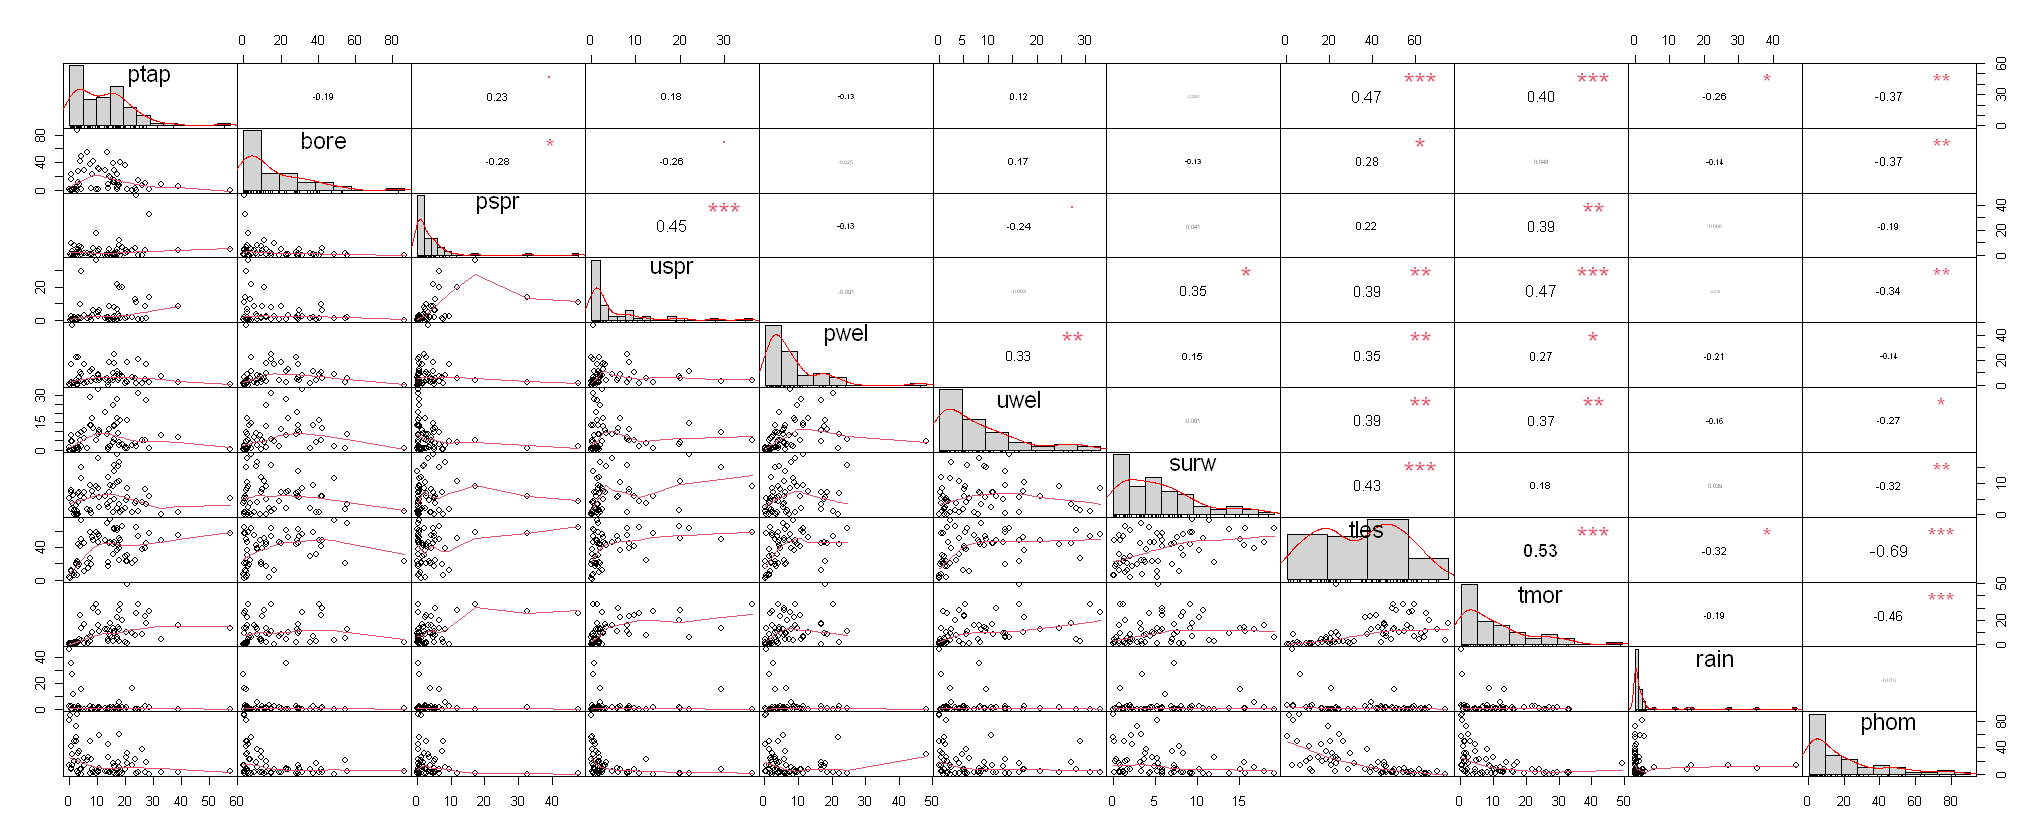

In [22]:
summary(df.wa)
chart.Correlation(df.wa, histogram=TRUE, pch=19 , tl.cex = .7 )

# Spider Plots of the variables

In [47]:
# Create data: Water Accessibility Aggregate
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters4), mean)
df.wa.aggregate <- df.wa.aggregate[,2:12]
df.wa.aggregate

ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,rain,phom
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11.586364,35.109091,1.290909,2.5590909,9.254545,11.950000,5.350000,48.554545,12.195455,0.4590909,6.086364
4.564286,1.028571,0.850000,0.1785714,2.421429,3.157143,1.807143,9.635714,1.142857,0.5214286,61.928571
21.725000,4.535000,7.935000,9.8850000,7.490000,8.555000,9.185000,51.660000,19.000000,1.6750000,5.180000
7.436364,4.681818,2.045455,1.2454545,4.781818,2.445455,3.318182,13.790909,2.940909,6.7954545,18.672727


# Extract table of cluster centroids.

[1] 64.61971 63.01837 62.65992 26.76747

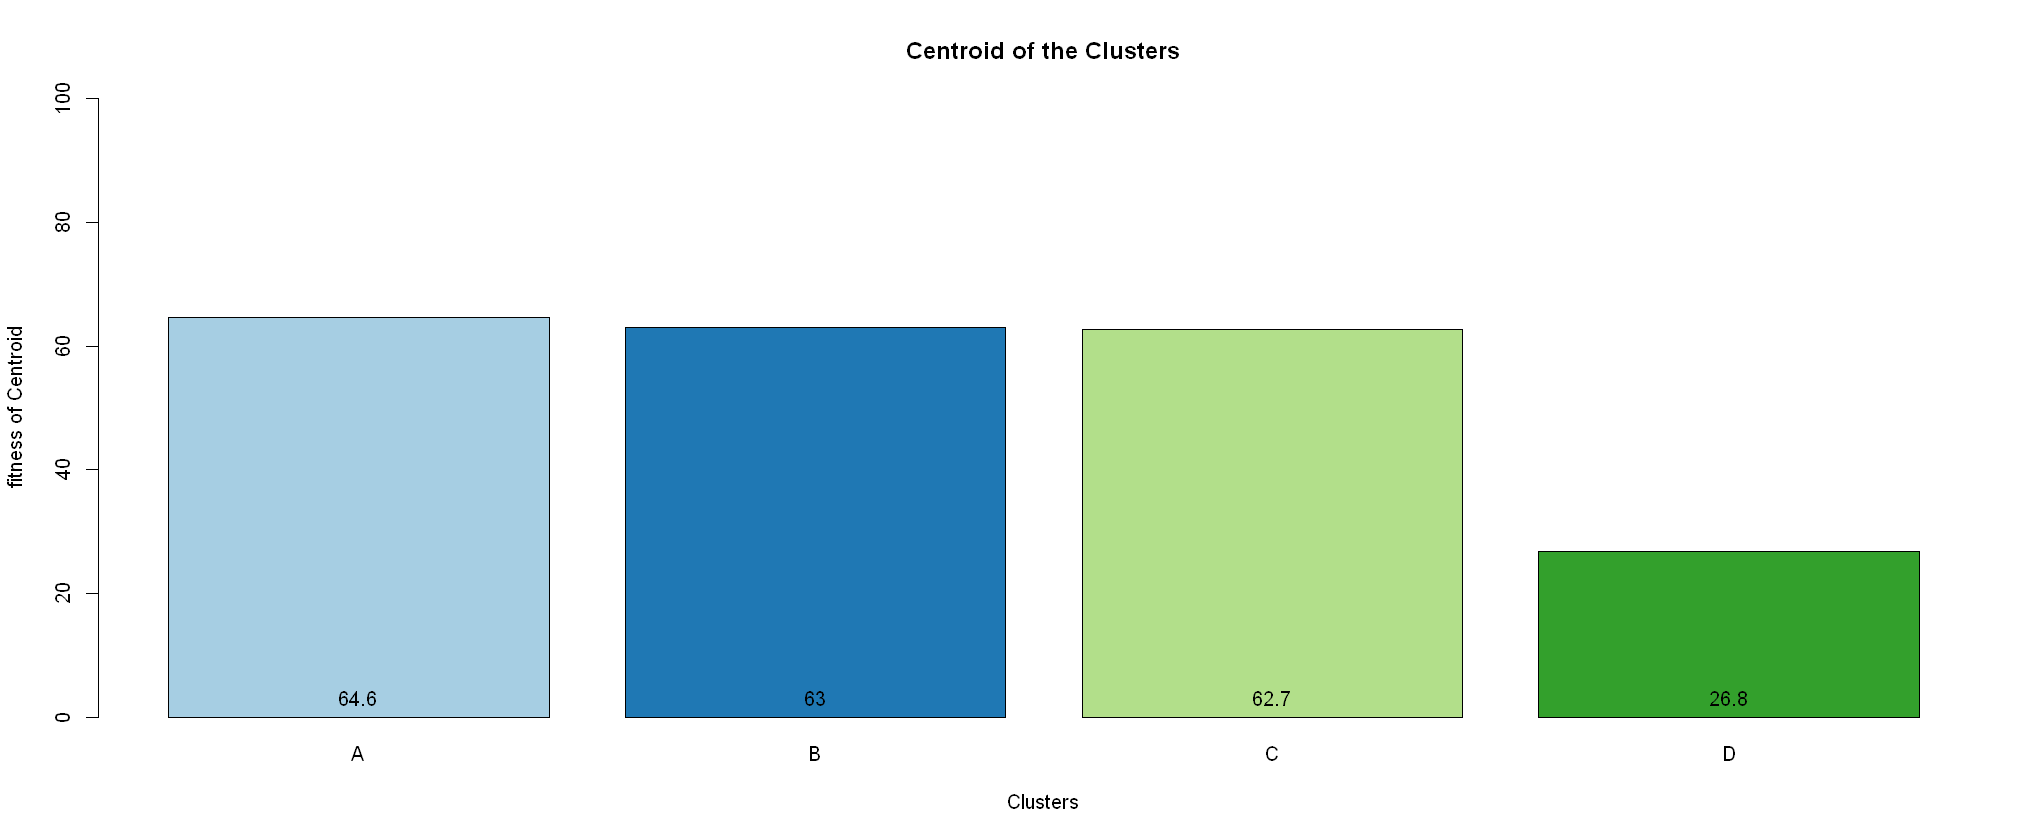

[1] 57.75967 53.28292 54.85690 88.32214 42.05627 89.50240 64.37391 28.76717
 [9] 69.20000 76.72092 88.75624 44.78750 66.13857 79.02082 79.18819 81.18885
[17] 39.24245 55.64369 80.22375 57.33053 13.10382 90.85945 65.44883 55.00382
[25] 67.50733 41.63136 60.62631 53.16587 22.34905 66.30596 31.45282 75.16056
[33] 44.41002 55.57311 29.32013 57.27032 63.64181 51.42402 48.65480 71.27419
[41] 89.98844 75.36909 92.03103 48.64535 74.84424 66.99052 56.79067 60.48959
[49] 57.81488 58.18178 60.08261 50.83296 38.00342 79.16533 73.74429 62.31934
[57] 64.78958  0.00000 74.44542 29.94528 79.18188 83.13032 33.69688 75.43202
[65] 50.37896 39.62436 52.24577 44.32945 74.40612 50.85637 30.51754 73.76341
[73] 59.98983 67.12101 13.40298 17.06136 63.95545 62.46759

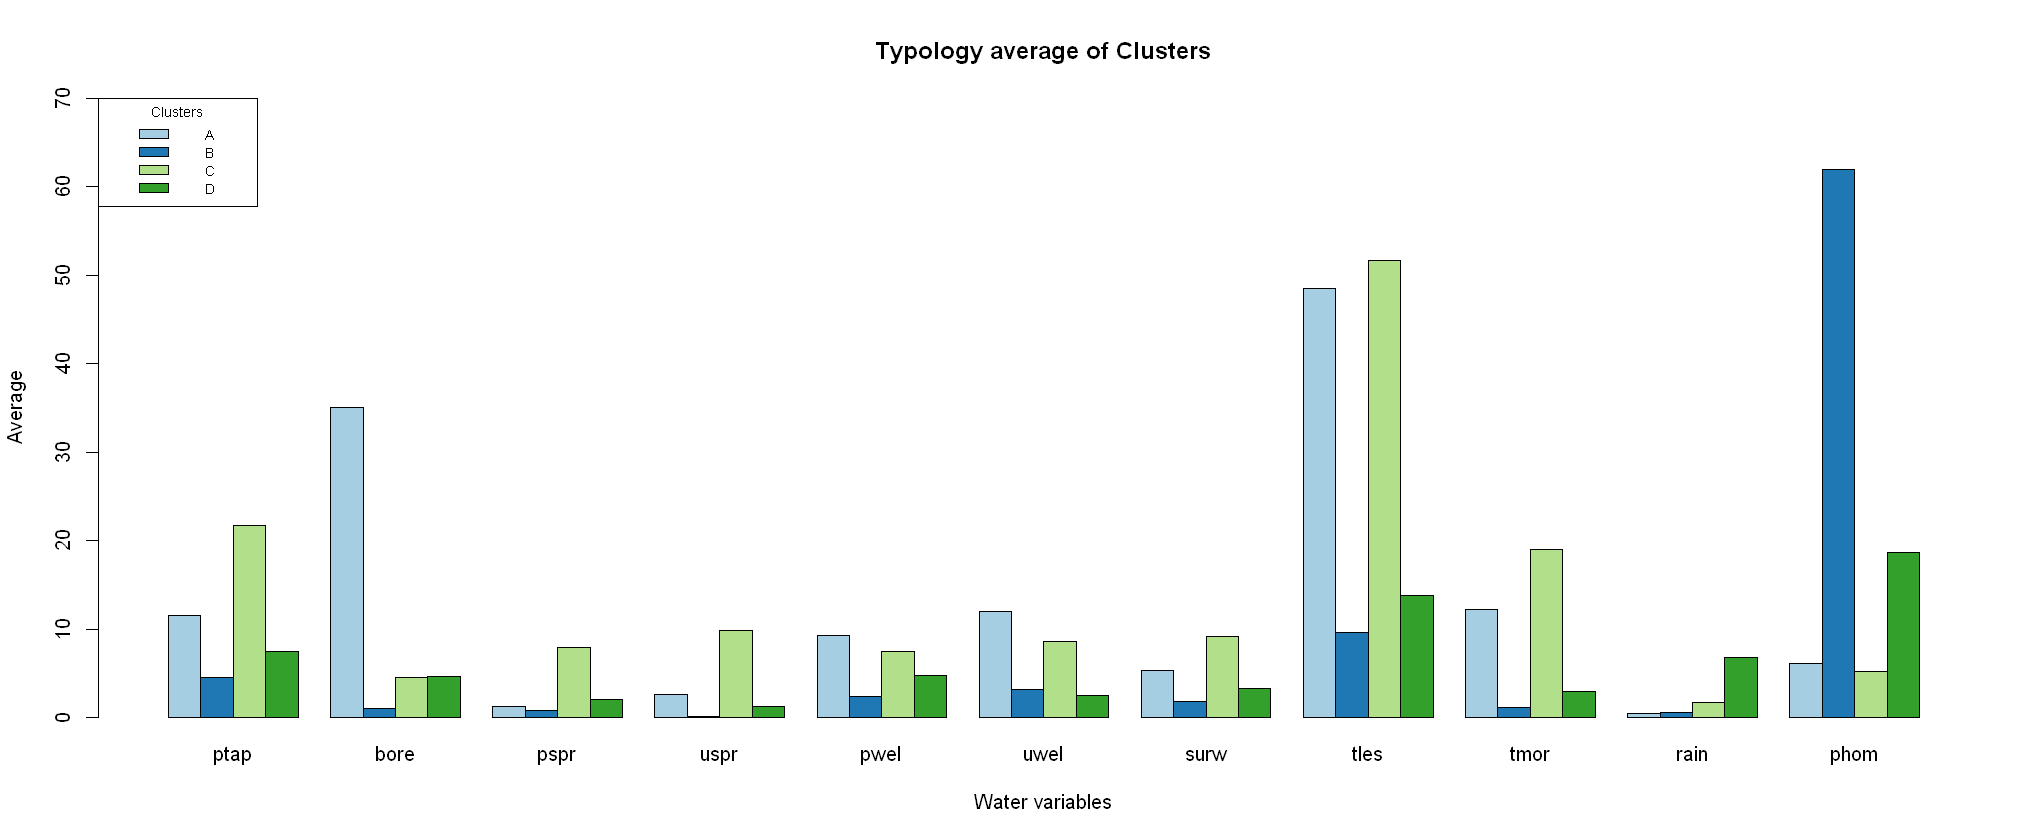

In [48]:
centroid <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster
centroid
old.par <- par(mar = c(0, 0, 0, 0))
par(old.par)

bp <- barplot(centroid,
        main = "Centroid of the Clusters", xlab = "Clusters", ylab = "fitness of Centroid",
        col = c("#a6cee3",  "#1f78b4",  "#b2df8a",  "#33a02c"),
        ylim = c(0, 100), names.arg = c("A", "B", "C","D"))
text(bp, 0, round(centroid, 1),cex=1,pos=3)

barplot(as.matrix(df.wa.aggregate),
        beside = TRUE,
        main = "Typology average of Clusters", xlab = "Water variables", ylab = "Average",
        col = c("#a6cee3",  "#1f78b4",  "#b2df8a",  "#33a02c"),
        legend = c("A", "B", "C","D"), 
        args.legend = list(title = "Clusters", x = "topleft", cex = .7), ylim = c(0, 70))


centroiddf.wa <- apply(df.wa, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster
centroiddf.wa

# Radar Plot for the aggregated data

ptap      bore      pspr      uspr      pwel      uwel      surw      tles 
4.5642857 1.0285714 0.8500000 0.1785714 2.4214286 2.4454545 1.8071429 9.6357143 
     tmor      rain      phom 
1.1428571 0.4590909 5.1800000

ptap      bore      pspr      uspr      pwel      uwel      surw      tles 
21.725000 35.109091  7.935000  9.885000  9.254545 11.950000  9.185000 51.660000 
     tmor      rain      phom 
19.000000  6.795455 61.928571

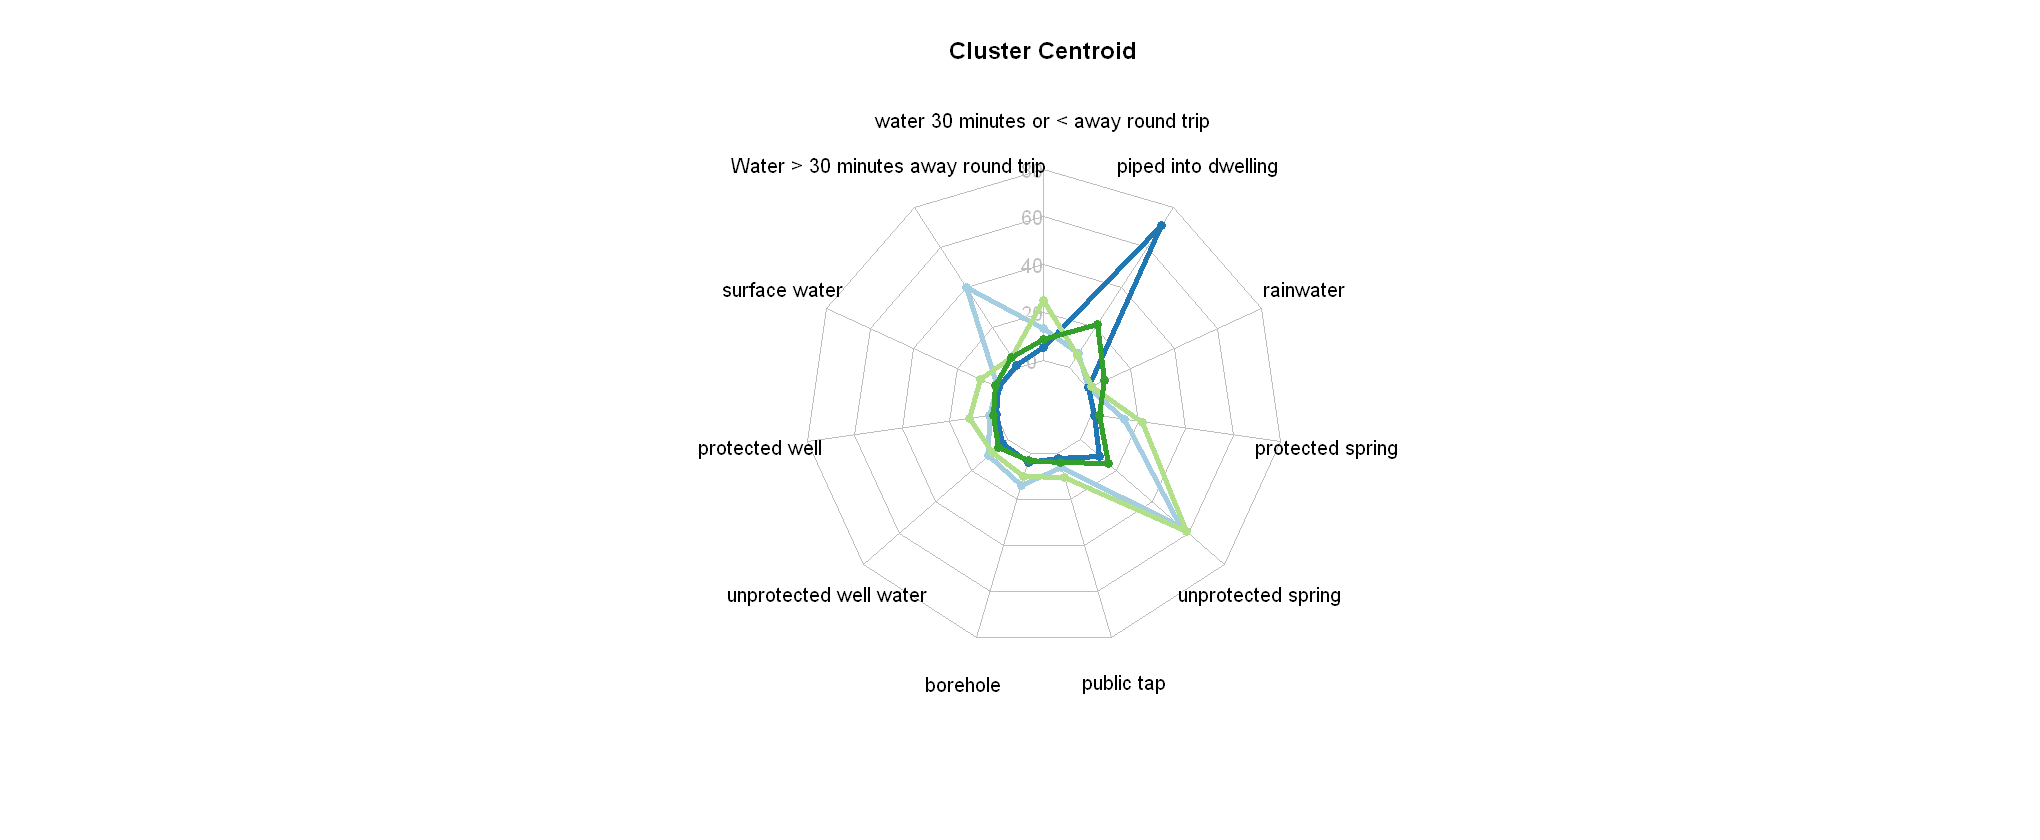

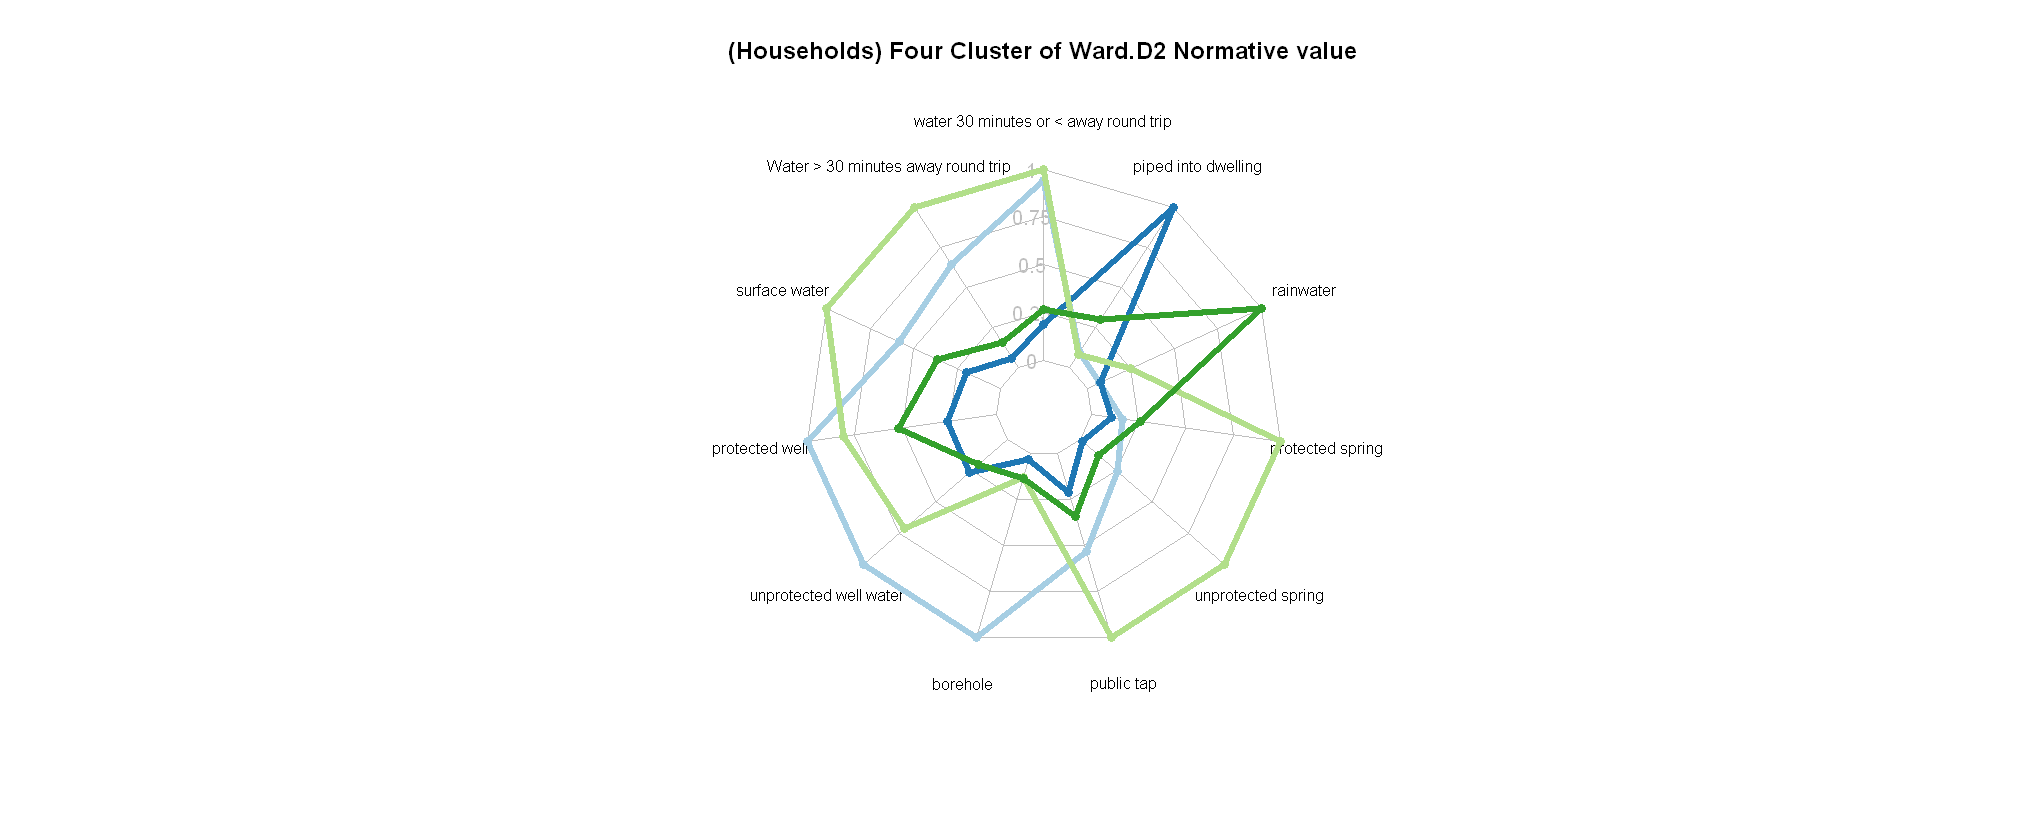

In [49]:
# To use the fmsb package, I have to add 2 lines to the data frame: the max and min of each topic to show on the plot!
max.aggregate = apply(df.wa.aggregate,2,max)
apply(df.wa.aggregate,2,min)
max.aggregate

norm.df.wa <- sweep(df.wa.aggregate, 2, max.aggregate, FUN = '/')
data.spider <- rbind(rep(70,70) , rep(0,10) , df.wa.aggregate)
colnames(data.spider) <- c("water 30 minutes or < away round trip" , "Water > 30 minutes away round trip" , "surface water" , "protected well" , "unprotected well water", "borehole" , "public tap" , "unprotected spring", "protected spring", "rainwater" ,"piped into dwelling")


# The default radar chart for First Cluster
r.c. <- radarchart(data.spider,
           #custom polygon
           pcol= c("#a6cee3",  "#1f78b4",  "#b2df8a",  "#33a02c") ,  plwd=4 , plty=1,
           #custom the grid
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels= seq(0,80,20), cglwd=0.8, axistype = 4,
           title = 'Cluster Centroid',
           vlcex=1,
           calcex = 1
           )
colnames(norm.spider) <- c("water 30 minutes or < away round trip" , "Water > 30 minutes away round trip" , "surface water" , "protected well" , "unprotected well water", "borehole" , "public tap" , "unprotected spring", "protected spring", "rainwater" ,"piped into dwelling")

r.c <- radarchart(norm.spider,
           #custom polygon
           pcol= c("#a6cee3",  "#1f78b4",  "#b2df8a",  "#33a02c")  ,  plwd=5 , plty=1,
           #custom the grid
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels= seq(0,1,.25), cglwd=0.8, axistype = 4,
           title = '(Households) Four Cluster of Ward.D2 Normative value',
           vlcex =.8
)